# Machine Learning Engineer Nanodegree
## Capstone Project: Predicting Credit Default with MLP
<p><b>David Petersen, February 1, 2018 </b>

<p>For my capstone project, I will measure and compare the success of MLP methods and more traditional methods in predicting credit default. More specifically, I will use 5 different techniques -- logistic regression, SVM, classification trees, neural networks, and an RNN -- to predict consumer credit default over 3 different public datasets. The datasets, as identified in the proposal, are from German, Australian, and Taiwanese consumers. I will compare results from these methods across datasets to assess whether the latest methods substantially improve predictive performance.

<p>Links to the datasets and a copy of the data key for each are located in the appendicies at the end of this project document.

### Summary of results

I analyzed results step-by-step throughout the project, and listed my conclusions in Section X below, but I thought it useful to also summarize them here. For the project, I looked at 3 datasets and tried to predict default using multiple techniques. The most striking result was that results differed strongly by dataset, likely because of the data available in each and differences in the kinds of loans and default definitions. Given that, I found that on the toughest dataset (Taiwan), the MLP neural network model was the best performer, and RNNs showed great promise. I believe that result would generalize to other projects as well. However the improvement was somewhat modest -- not a 2x or 10x improvement -- over older, higher-biased methods. Thinking about generalization of this result, it is perhaps true that with increases in data volume and features, this improvement from neural networks over older methods would grow significantly, although this somewhat limits the number of possible use cases.

This project also uncovered a number of different opportunities for further research, including on the raw data and model selection methods. Perhaps the most interesting opportunity is exploring how you could integrate the MLP and RNN models to further improve performance.

### Table of Contents:

[I. Loading Datasets](#loading_datasets) <br />
[II. Exploratory Data Analysis](#eda) <br />
[III. Visualizing Features and Their Ability to Predict Default](#visualize)  <br />
[IV. Model Preparation - Data Preprocessing](#modelprep)  <br />
[V. Model Estimation - First Round](#estimation1) <br />
[VI. Engineering New Features for a Second Round of Models](#feature_engineering) <br />
[VII. Model Estimation - Round II - Taiwan Data](#estimation2) <br />
[VIII. MLP Model - Taiwan](#mlp-taiwan) <br />
[IX. RNN - Sequence Model](#rnn-taiwan) <br />
[X. Conclusions](#conclusions) <br />
[Appendix: Australian Data Key](#aus-data) <br />
[Appendix: Taiwan Data Key](#taiwan-data) <br />
[Appendix: German Data Key](#german-data) <br />

<a id='loading_datasets'></a>

## I. Loading Datasets

My first step in this project will be to load three datasets on credit default: two, older datasets from Germany and Australia, and a newer, larger dataset from Taiwan. 

In [456]:
# import and data handling libraries
import csv
import numpy as np
import pandas as pd

In [457]:
def getdata(dataset, filename):
    df = pd.read_csv(filename)
    print(dataset+' dataframe shape: '+str(df.shape))
    return df

In [458]:
taiwan = getdata('taiwan', '/Users/David/Dropbox/credit_defaults.csv')
german = getdata('german', '/Users/David/Dropbox/german_credit_data.csv')
aus = getdata('aus', '/Users/David/Dropbox/australian_credit_data.csv')

taiwan dataframe shape: (30000, 25)
german dataframe shape: (1000, 21)
aus dataframe shape: (690, 15)


The datasets are of the expected size. I'd like to take a quick look at the data to make sure the contents are what I expect:

In [459]:
# Display a few observations from each dataset
from IPython.display import display

display('Taiwan',taiwan.head(5))
display('German',german.head(5))
display('Australian',aus.head(5))

'Taiwan'

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

      ...       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     ...               0          0          0         0       689         0   
1     ...            3272       3455       3261         0      1000      1000   
2     ...           14331      14948      15549      1518      1500      1000   
3     ...           28314      28959      29547      2000      2019      1200   
4     ...           20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default_Pmt  
0         0         0         0            1  
1      1000         0      2000            1  
2      1000      1000      5000            0  
3      1100      1069      1000            0  
4      9000       689       679            0  

[5 rows x 25 columns]

'German'

Checking_Status  Duration Credit_History Loan_Purpose  Credit_Amount  \
0             A11         6            A34          A43           1169   
1             A12        48            A32          A43           5951   
2             A14        12            A34          A46           2096   
3             A11        42            A32          A42           7882   
4             A11        24            A33          A40           4870   

  Savings-Bonds Employment  Install_Rate Gender-Status Guarantor   ...    \
0           A65        A75             4           A93      A101   ...     
1           A61        A73             2           A92      A101   ...     
2           A61        A74             2           A93      A101   ...     
3           A61        A74             2           A93      A103   ...     
4           A61        A73             3           A93      A101   ...     

   Property Age_Yrs  Other_Inst Housing Bank_Credits   Job Dependents  \
0      A121      67        A143    A152            2  A173          1   
1      A121      22        A143    A152            1  A173          1   
2      A121      49        A143    A152            1  A172          2   
3      A122      45        A143    A153            1  A173          2   
4      A124      53        A143    A153            2  A173          2   

   Telephone Foreign_Worker Default  
0       A192           A201       1  
1       A191           A201       2  
2       A191           A201       1  
3       A191           A201       1  
4       A191           A201       2  

[5 rows x 21 columns]

'Australian'

Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0         1     22.08     11.46         2         4         4     1.585   
1         0     22.67      7.00         2         8         4     0.165   
2         0     29.58      1.75         1         4         4     1.250   
3         0     21.67     11.50         1         5         3     0.000   
4         1     20.17      8.17         2         6         4     1.960   

   Feature8  Feature9  Feature10  Feature11  Feature12  Feature13  Feature14  \
0         0         0          0          1          2        100       1213   
1         0         0          0          0          2        160          1   
2         0         0          0          1          2        280          1   
3         1         1         11          1          2          0          1   
4         1         1         14          0          2         60        159   

   Default  
0        0  
1        0  
2        0  
3        1  
4        1

In [460]:
# drop ID from taiwan dataset - not needed for this analysis
del taiwan['ID']

In [461]:
# change the default variable from 1/2 to 0/1 and verify result
def fixy(df,labelvar):
    df[labelvar] = df[labelvar] - 1
    return df

fixy(german,'Default')
german['Default'].describe()

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Default, dtype: float64

<a id='#eda'></a>

<a id='eda'></a>
## II. Exploratory Data Analysis

### Tabulating classes 

Before I begin data analysis, I'd like to understand the relative size of the classes within each of my datasets: How many defaulters vs. non-defaulters do I have?

In [462]:
# Create function to built single-var cross tabs for categorical variables
def count_maker(df):
    for colname, col in df.iteritems():
        display(pd.crosstab(index=df[colname],  # Make a crosstab
                      columns="count", margins=True))         # Name the count column


In [463]:
print('\n'+'German: Distribution of Non-Default (0) vs. Default (1): ')
count_maker(pd.DataFrame(german['Default']))

print('\n'+'Australian: Distribution of Non-Default (0) vs. Default (1): ')
count_maker(pd.DataFrame(aus['Default']))

print('\n'+'Taiwan: Distribution of Non-Default (0) vs. Default (1): ')
count_maker(pd.DataFrame(taiwan['Default_Pmt']))


German: Distribution of Non-Default (0) vs. Default (1): 


col_0    count   All
Default             
0          700   700
1          300   300
All       1000  1000


Australian: Distribution of Non-Default (0) vs. Default (1): 


col_0    count  All
Default            
0          383  383
1          307  307
All        690  690


Taiwan: Distribution of Non-Default (0) vs. Default (1): 


col_0        count    All
Default_Pmt              
0            23364  23364
1             6636   6636
All          30000  30000

For the German dataset, 30% of the observations are default. For the Australian dataset, it's about 44% default. And for the Taiwan dataset, 6636 of 30,000 = 22% of the data points are default. Among the three datasets, this is significant variation in class size -- it will be interesting to see if that impacts our results on which techniques are best for predicting default.

### German Data Content Analysis

Now that I've loaded my data, and observed that it largely appears as I expected, I'd like to do some data analysis to better understand it's contents. As a first step, I want to make sure I understand how the variables are coded, and make sure there aren't any miscodings or missing values. I will have to do this for each dataset independently.

I will start with the smaller datasets since I'd like to use those as benchmarks. Taking the German dataset first, I will choose the categorical variables and examine the frequency counts for each value, making sure they match the data key.

In [464]:
german.dtypes # ensure variables and features data types coded correctly

Checking_Status    object
Duration            int64
Credit_History     object
Loan_Purpose       object
Credit_Amount       int64
Savings-Bonds      object
Employment         object
Install_Rate        int64
Gender-Status      object
Guarantor          object
Res_Since           int64
Property           object
Age_Yrs             int64
Other_Inst         object
Housing            object
Bank_Credits        int64
Job                object
Dependents          int64
Telephone          object
Foreign_Worker     object
Default             int64
dtype: object

In [465]:
# Get simple frequency counts for German categorical variables
german_cat = german.select_dtypes(exclude=['int64']) # get the categorical variables from german dataset
count_maker(german_cat)

col_0            count   All
Checking_Status             
A11                274   274
A12                269   269
A13                 63    63
A14                394   394
All               1000  1000

col_0           count   All
Credit_History             
A30                40    40
A31                49    49
A32               530   530
A33                88    88
A34               293   293
All              1000  1000

col_0         count   All
Loan_Purpose             
A40             234   234
A41             103   103
A410             12    12
A42             181   181
A43             280   280
A44              12    12
A45              22    22
A46              50    50
A48               9     9
A49              97    97
All            1000  1000

col_0          count   All
Savings-Bonds             
A61              603   603
A62              103   103
A63               63    63
A64               48    48
A65              183   183
All             1000  1000

col_0       count   All
Employment             
A71            62    62
A72           172   172
A73           339   339
A74           174   174
A75           253   253
All          1000  1000

col_0          count   All
Gender-Status             
A91               50    50
A92              310   310
A93              548   548
A94               92    92
All             1000  1000

col_0      count   All
Guarantor             
A101         907   907
A102          41    41
A103          52    52
All         1000  1000

col_0     count   All
Property             
A121        282   282
A122        232   232
A123        332   332
A124        154   154
All        1000  1000

col_0       count   All
Other_Inst             
A141          139   139
A142           47    47
A143          814   814
All          1000  1000

col_0    count   All
Housing             
A151       179   179
A152       713   713
A153       108   108
All       1000  1000

col_0  count   All
Job               
A171      22    22
A172     200   200
A173     630   630
A174     148   148
All     1000  1000

col_0      count   All
Telephone             
A191         596   596
A192         404   404
All         1000  1000

col_0           count   All
Foreign_Worker             
A201              963   963
A202               37    37
All              1000  1000

Now that I have these cateogry values, I need to compare the values each feature can take with the data key. For reference, the document with the data key for the German dataset is here: 

https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

I have also included it in a markdown cell as an appendix below. I need to make sure each of the codes is valid in the key. This simplest way to do this is by hand:

- Checking_Status: OK
- Credit_History: OK
- Loan_Purpose: OK
- Savings-Bonds: OK
- Employment: OK
- Gender-Status: OK
- Guarantor: OK
- Property: OK
- Other_Inst: OK
- Housing: OK
- Job: OK
- Telephone: OK
- Foreign_Worker: OK

All the categorical variables look clean. Next, I'd like to look at the distributions of my numeric features:


In [616]:
pd.options.display.float_format = '{:.2f}'.format
german.select_dtypes(include=['int64']).describe()

Duration  Credit_Amount  Install_Rate  Res_Since  Age_Yrs  \
count   1000.00        1000.00       1000.00    1000.00  1000.00   
mean      20.90        3271.26          2.97       2.85    35.55   
std       12.06        2822.74          1.12       1.10    11.38   
min        4.00         250.00          1.00       1.00    19.00   
25%       12.00        1365.50          2.00       2.00    27.00   
50%       18.00        2319.50          3.00       3.00    33.00   
75%       24.00        3972.25          4.00       4.00    42.00   
max       72.00       18424.00          4.00       4.00    75.00   

       Bank_Credits  Dependents  Default  
count       1000.00     1000.00  1000.00  
mean           1.41        1.16     0.30  
std            0.58        0.36     0.46  
min            1.00        1.00     0.00  
25%            1.00        1.00     0.00  
50%            1.00        1.00     0.00  
75%            2.00        1.00     1.00  
max            4.00        2.00     1.00

Here, I'm interested in whether or not all the values are filled (they are, count = 1000 in each case) and whether or not there are any weird outliers. On the outlier front, I'm going to use a rule of thumb that, for a normal distribution, usually 99% of the observations would fall within +/- 3 standard deviations of the mean. Many of my features are truncated below by zero, so I'm primarily concerned with outliers to right side of the mean. Here, both "duration" and "credit_amount" look like they may have some outliers - I will check out some plots to investigate further.

One other observation is that several of the features -- install_rate, res_since, bank_credits, and dependents all have scales that start at 1 and go to 2 or 4. I am little concerned that they were miscoded as numerical rather than categorical variables. Upon review of the data key below, it's possible that they are correct -- the bank doesn't lend to people who have a high installment payment as a percentage of income (and percentages were rounded). Also there are potentially limits to how many bank credits are allowed (measured in "count of bank credits"). Since these are plausible, I'm going to merely note that here and proceed. If this were current data, and we were working to implement a model into a production system, I'd want to understand this better.

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


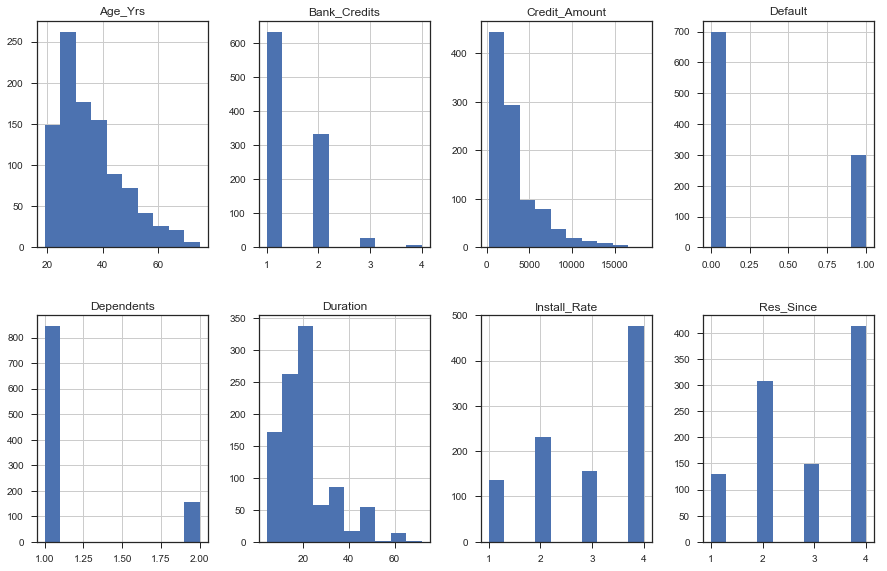

In [467]:
# Plot continuous variables to look for outliers
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
german.select_dtypes(exclude=['object']).hist(layout=(3,4), ax=ax)
plt.show()

There's nothing from the histogram plots that is an obvious problem. The duration feature has some observations out on the right side of the distribution, but it doesn't look extreme. The other variables, noted above, show confirmation of their discrete nature in the plots though this alone doesn't invalidate them as numerical features.

### Australian Data Content Analysis

I'm satisfied that the German data is pretty clean and ready for further analysis. Now, I'll turn to the Australian data.


In [468]:
aus.dtypes # ensure variables and features data types coded correctly

Feature1       int64
Feature2     float64
Feature3     float64
Feature4       int64
Feature5       int64
Feature6       int64
Feature7     float64
Feature8       int64
Feature9       int64
Feature10      int64
Feature11      int64
Feature12      int64
Feature13      int64
Feature14      int64
Default        int64
dtype: object

According to the key (Australian data key is in the appendix below, after the German key), features 1, 4, 5, 6, 8, 9, 11, 12, and 15 are supposed to be categorical. The others are continuous. I'm going to change the categorical features to object data type before proceeding, and leave the others as int or float.

In [469]:
# Columns we want to change to categorical features
objcol = ['Feature1','Feature4','Feature5', 'Feature6', 'Feature8', 'Feature9',
          'Feature11','Feature12','Feature15']

# Change them using 'astype'
def objmaker(df,collist):
    for colname, col in df.iteritems():
        if df[colname].name in collist:
            df[colname] = df[colname].astype(object)

objmaker(aus,objcol)

# Confirm changes         
aus.dtypes

Feature1      object
Feature2     float64
Feature3     float64
Feature4      object
Feature5      object
Feature6      object
Feature7     float64
Feature8      object
Feature9      object
Feature10      int64
Feature11     object
Feature12     object
Feature13      int64
Feature14      int64
Default        int64
dtype: object

In [470]:
# Get simple frequency counts for Australian categorical variables
aus_cat = aus.select_dtypes(include=['object']) # get the categorical variables from aus dataset
count_maker(aus_cat)

col_0     count  All
Feature1            
0           222  222
1           468  468
All         690  690

col_0     count  All
Feature4            
1           163  163
2           525  525
3             2    2
All         690  690

col_0     count  All
Feature5            
1            53   53
2            30   30
3            59   59
4            51   51
5            10   10
6            54   54
7            38   38
8           146  146
9            64   64
10           25   25
11           78   78
12            3    3
13           41   41
14           38   38
All         690  690

col_0     count  All
Feature6            
1            57   57
2             6    6
3             8    8
4           408  408
5            59   59
7             6    6
8           138  138
9             8    8
All         690  690

col_0     count  All
Feature8            
0           329  329
1           361  361
All         690  690

col_0     count  All
Feature9            
0           395  395
1           295  295
All         690  690

col_0      count  All
Feature11            
0            374  374
1            316  316
All          690  690

col_0      count  All
Feature12            
1             57   57
2            625  625
3              8    8
All          690  690

Again comparing these results to the data key by hand (please see appendix), all of these categorical features match what's shown in the key. The contents of each feature match the categories in the key exactly. Next we will look at the continuous features:

In [617]:
aus.select_dtypes(exclude=['object']).describe()

Feature2  Feature3  Feature7  Feature10  Feature13  Feature14  Default
count    690.00    690.00    690.00     690.00     690.00     690.00   690.00
mean      31.57      4.76      2.22       2.40     184.01    1018.39     0.44
std       11.85      4.98      3.35       4.86     172.16    5210.10     0.50
min       13.75      0.00      0.00       0.00       0.00       1.00     0.00
25%       22.67      1.00      0.17       0.00      80.00       1.00     0.00
50%       28.62      2.75      1.00       0.00     160.00       6.00     0.00
75%       37.71      7.21      2.62       3.00     272.00     396.50     1.00
max       80.25     28.00     28.50      67.00    2000.00  100001.00     1.00

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


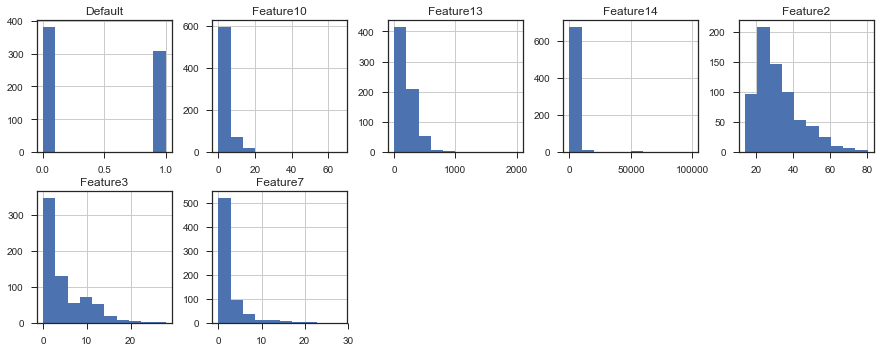

In [472]:
# Plot continuous variables to look for outliers
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
aus.select_dtypes(exclude=['object']).hist(layout=(5,5), ax=ax)
plt.show()


Looking at the contents of the describe() output, we see that there are no missing values for the Australian dataset.  The plots don't show large counts of outliers at the end of the distribution  -- Feature 13 looks like it has a little distribution mass pretty far to the right, but it doesn't make up a large percentage of the dataset. I'm going to proceed with this dataset as is.

Let's move on to looking at our largest, most recent data set, from Taiwan:

### Taiwan Data Content Analysis

In [473]:
taiwan.dtypes

LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1      int64
BILL_AMT2      int64
BILL_AMT3      int64
BILL_AMT4      int64
BILL_AMT5      int64
BILL_AMT6      int64
PAY_AMT1       int64
PAY_AMT2       int64
PAY_AMT3       int64
PAY_AMT4       int64
PAY_AMT5       int64
PAY_AMT6       int64
Default_Pmt    int64
dtype: object

For some reason, the dataset imported everything as integer, whereas we know of three features we want to be categorical. Let's change them here using the function we defined above:

In [474]:
# Columns we want to change to categorical features
objcol = ['SEX','EDUCATION','MARRIAGE']

# Make the changes
objmaker(taiwan,objcol)

# Confirm changes         
taiwan.dtypes

LIMIT_BAL       int64
SEX            object
EDUCATION      object
MARRIAGE       object
AGE             int64
PAY_0           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
Default_Pmt     int64
dtype: object

In [475]:
# Get simple frequency counts for Taiwan categorical variables
taiwan_cat = taiwan.select_dtypes(include=['object']) # get the categorical variables from aus dataset
count_maker(taiwan_cat)

col_0  count    All
SEX                
1      11888  11888
2      18112  18112
All    30000  30000

col_0      count    All
EDUCATION              
0             14     14
1          10585  10585
2          14030  14030
3           4917   4917
4            123    123
5            280    280
6             51     51
All        30000  30000

col_0     count    All
MARRIAGE              
0            54     54
1         13659  13659
2         15964  15964
3           323    323
All       30000  30000

In [618]:
taiwan.select_dtypes(exclude=['object']).describe()

LIMIT_BAL      AGE    PAY_0    PAY_2    PAY_3    PAY_4    PAY_5  \
count   30000.00 30000.00 30000.00 30000.00 30000.00 30000.00 30000.00   
mean   167484.32    35.49    -0.02    -0.13    -0.17    -0.22    -0.27   
std    129747.66     9.22     1.12     1.20     1.20     1.17     1.13   
min     10000.00    21.00    -2.00    -2.00    -2.00    -2.00    -2.00   
25%     50000.00    28.00    -1.00    -1.00    -1.00    -1.00    -1.00   
50%    140000.00    34.00     0.00     0.00     0.00     0.00     0.00   
75%    240000.00    41.00     0.00     0.00     0.00     0.00     0.00   
max   1000000.00    79.00     8.00     8.00     8.00     8.00     8.00   

         PAY_6  BILL_AMT1  BILL_AMT2     ...       BILL_AMT4  BILL_AMT5  \
count 30000.00   30000.00   30000.00     ...        30000.00   30000.00   
mean     -0.29   51223.33   49179.08     ...        43262.95   40311.40   
std       1.15   73635.86   71173.77     ...        64332.86   60797.16   
min      -2.00 -165580.00  -69777.00     ...      -170000.00  -81334.00   
25%      -1.00    3558.75    2984.75     ...         2326.75    1763.00   
50%       0.00   22381.50   21200.00     ...        19052.00   18104.50   
75%       0.00   67091.00   64006.25     ...        54506.00   50190.50   
max       8.00  964511.00  983931.00     ...       891586.00  927171.00   

       BILL_AMT6  PAY_AMT1   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
count   30000.00  30000.00   30000.00  30000.00  30000.00  30000.00  30000.00   
mean    38871.76   5663.58    5921.16   5225.68   4826.08   4799.39   5215.50   
std     59554.11  16563.28   23040.87  17606.96  15666.16  15278.31  17777.47   
min   -339603.00      0.00       0.00      0.00      0.00      0.00      0.00   
25%      1256.00   1000.00     833.00    390.00    296.00    252.50    117.75   
50%     17071.00   2100.00    2009.00   1800.00   1500.00   1500.00   1500.00   
75%     49198.25   5006.00    5000.00   4505.00   4013.25   4031.50   4000.00   
max    961664.00 873552.00 1684259.00 896040.00 621000.00 426529.00 528666.00   

       Default_Pmt  
count     30000.00  
mean          0.22  
std           0.42  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.00  
max           1.00  

[8 rows x 21 columns]

A couple of observations here:

- In the categorical data, the features 'sex' and 'education' correspond exactly to the key. The 'marriage' feature is supposed to only have 3 categories, but the data has a fourth category of zero, with 54 people in it. I wasn't able to find any more information about why this is the case, and since it is a very small percentage of the dataset I'm not going to worry about it for now.

- There are some numeric features, like bill amount, that have long tails on the right side of the distribution, e.g., a small number of very high values. But they aren't bigger than one order of magnitude larger than the bulk of the distribution's mass, and we have no reason to believe they are errors. So we will merely note them here and proceed.

- Most of the bill amount features have a minimum that is significantly *negative*, meaning perhaps that the balance was prepaid and thus they have an outstanding credit amount less than zero. The data key provides no information about this, so again without some indication that these are errors we will accept them as part of our dataset.

- The payment status features show how many months in arrears each payment happened. According to the key, for example, a status of "1" indicates payment delay for 1 month, a status of "2" indicates payment delay for 2 months. However, if a customer pays on time, that's not coded as a "0", but rather a "-1". And in the dataset there are observations coded as "-2", the meaning of which is not revealed on the data key.

On the last point, I scanned some of the observations with "-2" status below. There's nothing obviously different about them, e.g., that they have negative bill amounts. And looking at Default_Pmt, some of them default, some don't, just like the other classes. Perhaps it means that payment was received ahead of schedule. In any case, the -1 and -2 codings are strange for a numeric variable. I am tempted to convert these payment variables to categorical features, but since I would lose the ordered propery (e.g., delay of 2 months is less than delay of 3 months) I am going to leave them as is.

In [477]:
taiwan[taiwan['PAY_0'] == -2].head(10)

LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
9        20000   1         3        2   35     -2     -2     -2     -2     -1   
23      450000   2         1        1   40     -2     -2     -2     -2     -2   
33      500000   2         2        1   54     -2     -2     -2     -2     -2   
34      500000   1         1        1   58     -2     -2     -2     -2     -2   
45      210000   1         1        2   29     -2     -2     -2     -2     -2   
52      310000   2         2        1   49     -2     -2     -2     -2     -2   
55      500000   2         1        1   45     -2     -2     -2     -2     -2   
65      200000   1         1        1   57     -2     -2     -2     -1      2   
92      100000   2         1        2   27     -2     -2     -2     -2     -2   
100     140000   1         1        2   32     -2     -2     -2     -2     -2   

        ...       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
9       ...               0      13007      13912         0         0   
23      ...             560          0          0     19428      1473   
33      ...            7521      71439       8981      4152     22827   
34      ...            3180          0       5293      5006     31178   
45      ...               0          0          0         0         0   
52      ...           11185       3544        464      7875      7600   
55      ...               0        151       2530      3640       162   
65      ...            8174       8198       7918         0         0   
92      ...               0          0          0      7555         0   
100     ...             415        100       1430     10212       850   

     PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default_Pmt  
9           0     13007      1122         0            0  
23        560         0         0      1128            1  
33       7521     71439       981     51582            0  
34       3180         0      5293       768            0  
45          0         0         0         0            1  
52      11185      3544       464         0            0  
55          0       151      2530         0            0  
65       8222       300         0      1000            1  
92          0         0         0         0            0  
100       415       100      1430         0            0  

[10 rows x 24 columns]

/Applications/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


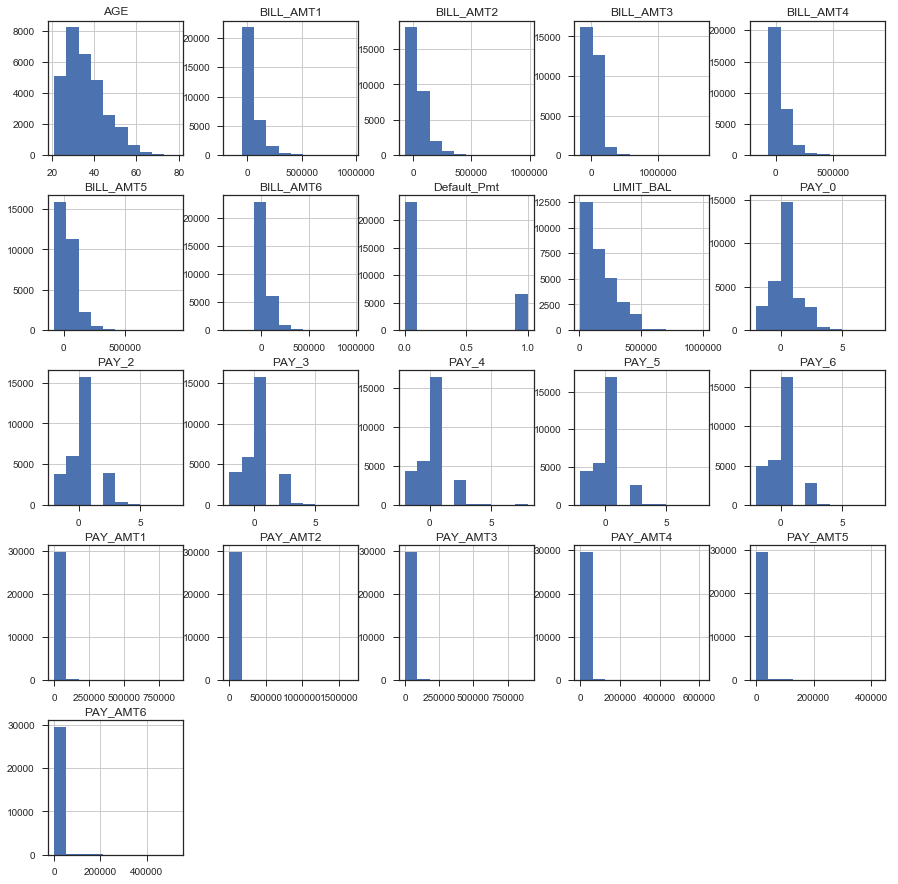

In [478]:
fig = plt.figure(figsize = (15,25))
ax = fig.gca()
taiwan.select_dtypes(exclude=['object']).hist(layout=(8,5), ax=ax)
plt.show()

<a id='visualize'></a>
## III. Visualizing Features and Their Ability to Predict Default

Here, we will begin to look at how differences in feature values correlate with the label membership. This will give us some indication of each feature's predictive power and allow us to question whether or not these relationships make sense.

### German Dataset

In [479]:
# function to produce crosstabs and odds ratios for categorical variables
# https://en.wikipedia.org/wiki/Odds_ratio
def ctab_maker(df,label_var):
    for colname in df:
        if df[colname].dtype == 'object':
            testvar = pd.crosstab(df[colname],  # Make a crosstab
                df[label_var], margins = True) 
            for idx, val in enumerate(testvar):
                testvar['sum1'] = testvar.iloc[len(testvar)-1,1]
                testvar['other1'] = testvar['sum1'] - testvar.iloc[:,1]
                testvar['sum0'] = testvar.iloc[len(testvar)-1,0]
                testvar['other0'] = testvar['sum0'] - testvar.iloc[:,0]
                testvar['num'] = testvar.iloc[:,1] / testvar['other1']
                testvar['denom'] = testvar.iloc[:,0] / testvar['other0']
                testvar['oddsratio'] = testvar['num'] / testvar['denom']
            display(testvar)

In [480]:
ctab_maker(german, 'Default')

Default            0    1   All  sum1  other1  sum0  other0       num  \
Checking_Status                                                         
A11              139  135   274   300     165   700     561  0.818182   
A12              164  105   269   300     195   700     536  0.538462   
A13               49   14    63   300     286   700     651  0.048951   
A14              348   46   394   300     254   700     352  0.181102   
All              700  300  1000   300       0   700       0       inf   

Default             denom  oddsratio  
Checking_Status                       
A11              0.247772   3.302158  
A12              0.305970   1.759850  
A13              0.075269   0.650350  
A14              0.988636   0.183184  
All                   inf        NaN

Default           0    1   All  sum1  other1  sum0  other0       num  \
Credit_History                                                         
A30              15   25    40   300     275   700     685  0.090909   
A31              21   28    49   300     272   700     679  0.102941   
A32             361  169   530   300     131   700     339  1.290076   
A33              60   28    88   300     272   700     640  0.102941   
A34             243   50   293   300     250   700     457  0.200000   
All             700  300  1000   300       0   700       0       inf   

Default            denom  oddsratio  
Credit_History                       
A30             0.021898   4.151515  
A31             0.030928   3.328431  
A32             1.064897   1.211457  
A33             0.093750   1.098039  
A34             0.531729   0.376132  
All                  inf        NaN

Default         0    1   All  sum1  other1  sum0  other0       num     denom  \
Loan_Purpose                                                                   
A40           145   89   234   300     211   700     555  0.421801  0.261261   
A41            86   17   103   300     283   700     614  0.060071  0.140065   
A410            7    5    12   300     295   700     693  0.016949  0.010101   
A42           123   58   181   300     242   700     577  0.239669  0.213172   
A43           218   62   280   300     238   700     482  0.260504  0.452282   
A44             8    4    12   300     296   700     692  0.013514  0.011561   
A45            14    8    22   300     292   700     686  0.027397  0.020408   
A46            28   22    50   300     278   700     672  0.079137  0.041667   
A48             8    1     9   300     299   700     692  0.003344  0.011561   
A49            63   34    97   300     266   700     637  0.127820  0.098901   
All           700  300  1000   300       0   700       0       inf       inf   

Default       oddsratio  
Loan_Purpose             
A40            1.614479  
A41            0.428877  
A410           1.677966  
A42            1.124303  
A43            0.575977  
A44            1.168919  
A45            1.342466  
A46            1.899281  
A48            0.289298  
A49            1.292398  
All                 NaN

Default          0    1   All  sum1  other1  sum0  other0       num     denom  \
Savings-Bonds                                                                   
A61            386  217   603   300      83   700     314  2.614458  1.229299   
A62             69   34   103   300     266   700     631  0.127820  0.109350   
A63             52   11    63   300     289   700     648  0.038062  0.080247   
A64             42    6    48   300     294   700     658  0.020408  0.063830   
A65            151   32   183   300     268   700     549  0.119403  0.275046   
All            700  300  1000   300       0   700       0       inf       inf   

Default        oddsratio  
Savings-Bonds             
A61             2.126787  
A62             1.168901  
A63             0.474315  
A64             0.319728  
A65             0.434121  
All                  NaN

Default       0    1   All  sum1  other1  sum0  other0       num     denom  \
Employment                                                                   
A71          39   23    62   300     277   700     661  0.083032  0.059002   
A72         102   70   172   300     230   700     598  0.304348  0.170569   
A73         235  104   339   300     196   700     465  0.530612  0.505376   
A74         135   39   174   300     261   700     565  0.149425  0.238938   
A75         189   64   253   300     236   700     511  0.271186  0.369863   
All         700  300  1000   300       0   700       0       inf       inf   

Default     oddsratio  
Employment             
A71          1.407294  
A72          1.784314  
A73          1.049935  
A74          0.625372  
A75          0.733208  
All               NaN

Default          0    1   All  sum1  other1  sum0  other0       num     denom  \
Gender-Status                                                                   
A91             30   20    50   300     280   700     670  0.071429  0.044776   
A92            201  109   310   300     191   700     499  0.570681  0.402806   
A93            402  146   548   300     154   700     298  0.948052  1.348993   
A94             67   25    92   300     275   700     633  0.090909  0.105845   
All            700  300  1000   300       0   700       0       inf       inf   

Default        oddsratio  
Gender-Status             
A91             1.595238  
A92             1.416764  
A93             0.702785  
A94             0.858887  
All                  NaN

Default      0    1   All  sum1  other1  sum0  other0       num     denom  \
Guarantor                                                                   
A101       635  272   907   300      28   700      65  9.714286  9.769231   
A102        23   18    41   300     282   700     677  0.063830  0.033973   
A103        42   10    52   300     290   700     658  0.034483  0.063830   
All        700  300  1000   300       0   700       0       inf       inf   

Default    oddsratio  
Guarantor             
A101        0.994376  
A102        1.878816  
A103        0.540230  
All              NaN

Default     0    1   All  sum1  other1  sum0  other0       num     denom  \
Property                                                                   
A121      222   60   282   300     240   700     478  0.250000  0.464435   
A122      161   71   232   300     229   700     539  0.310044  0.298701   
A123      230  102   332   300     198   700     470  0.515152  0.489362   
A124       87   67   154   300     233   700     613  0.287554  0.141925   
All       700  300  1000   300       0   700       0       inf       inf   

Default   oddsratio  
Property             
A121       0.538288  
A122       1.037972  
A123       1.052701  
A124       2.026096  
All             NaN

Default       0    1   All  sum1  other1  sum0  other0       num     denom  \
Other_Inst                                                                   
A141         82   57   139   300     243   700     618  0.234568  0.132686   
A142         28   19    47   300     281   700     672  0.067616  0.041667   
A143        590  224   814   300      76   700     110  2.947368  5.363636   
All         700  300  1000   300       0   700       0       inf       inf   

Default     oddsratio  
Other_Inst             
A141         1.767841  
A142         1.622776  
A143         0.549509  
All               NaN

Default    0    1   All  sum1  other1  sum0  other0       num     denom  \
Housing                                                                   
A151     109   70   179   300     230   700     591  0.304348  0.184433   
A152     527  186   713   300     114   700     173  1.631579  3.046243   
A153      64   44   108   300     256   700     636  0.171875  0.100629   
All      700  300  1000   300       0   700       0       inf       inf   

Default  oddsratio  
Housing             
A151      1.650179  
A152      0.535604  
A153      1.708008  
All            NaN

Default    0    1   All  sum1  other1  sum0  other0       num     denom  \
Job                                                                       
A171      15    7    22   300     293   700     685  0.023891  0.021898   
A172     144   56   200   300     244   700     556  0.229508  0.258993   
A173     444  186   630   300     114   700     256  1.631579  1.734375   
A174      97   51   148   300     249   700     603  0.204819  0.160862   
All      700  300  1000   300       0   700       0       inf       inf   

Default  oddsratio  
Job                 
A171      1.091013  
A172      0.886157  
A173      0.940730  
A174      1.273258  
All            NaN

Default      0    1   All  sum1  other1  sum0  other0       num     denom  \
Telephone                                                                   
A191       409  187   596   300     113   700     291  1.654867  1.405498   
A192       291  113   404   300     187   700     409  0.604278  0.711491   
All        700  300  1000   300       0   700       0       inf       inf   

Default    oddsratio  
Telephone             
A191        1.177424  
A192        0.849312  
All              NaN

Default           0    1   All  sum1  other1  sum0  other0        num  \
Foreign_Worker                                                          
A201            667  296   963   300       4   700      33  74.000000   
A202             33    4    37   300     296   700     667   0.013514   
All             700  300  1000   300       0   700       0        inf   

Default             denom  oddsratio  
Foreign_Worker                        
A201            20.212121   3.661169  
A202             0.049475   0.273137  
All                   inf        NaN

The categorical data from the German dataset show some significant predictive power. Here, I am using the odds ratios (https://en.wikipedia.org/wiki/Odds_ratio) to anaylze the ability of a category to predict default.

- Lower checking account balances raise the odds of default
- Having a lot of credit and/or historical delay in repayment raises the odds of default
- A larger savings account balance lowers the odds of default
- A longer employment history corresponds to lower odds of default
- Having no guarantor raises the odds of default
- Having real estate lowers default odds
- Having installment debt raises the odds
- Home owners appear to be a better risk

I will take a look at the numerical features below using boxplots. Credit amount and duration appear to be significantly positively correlated with default.

In [481]:
# visualizing numerical features and ability to predict default
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

def boxplots(df,labelvar):
    plot_var = []
    df_num = df.select_dtypes(exclude=['object'])
    plot_var = list(df_num.columns.values)
    for var in plot_var:
        sns.boxplot(x=labelvar, y=var, data=df)
        plt.show()


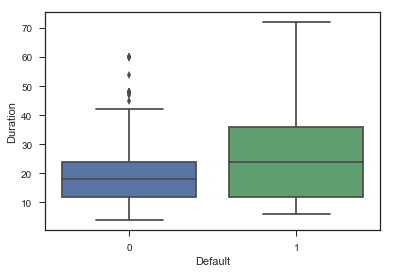

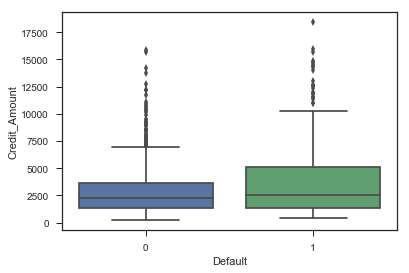

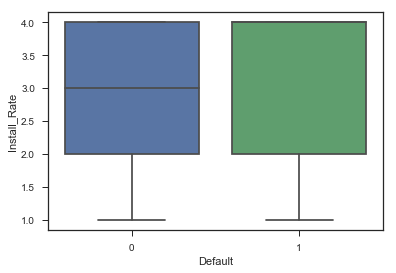

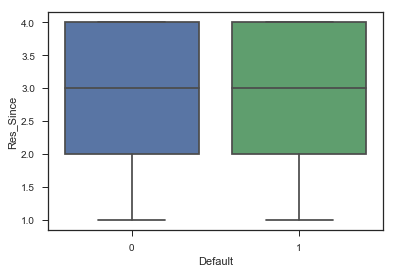

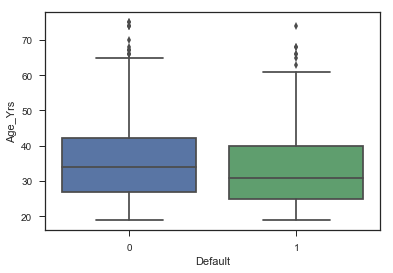

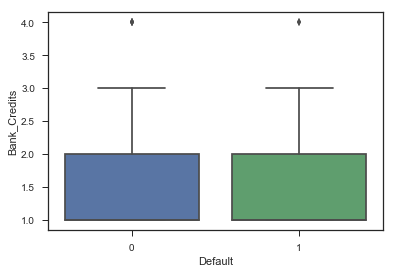

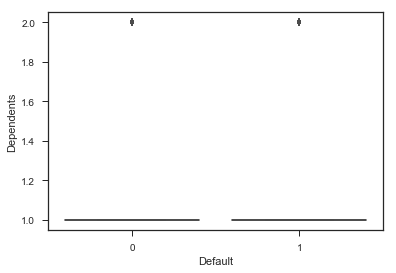

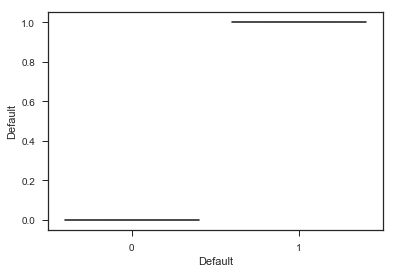

In [482]:
boxplots(german,'Default')

#### Australian Data

In [483]:
# Run crosstabs and oddss ratios
ctab_maker(aus, 'Default')

Default     0    1  All  sum1  other1  sum0  other0       num     denom  \
Feature1                                                                  
0         121  101  222   307     206   383     262  0.490291  0.461832   
1         262  206  468   307     101   383     121  2.039604  2.165289   
All       383  307  690   307       0   383       0       inf       inf   

Default   oddsratio  
Feature1             
0          1.061622  
1          0.941955  
All             NaN

Default     0    1  All  sum1  other1  sum0  other0       num     denom  \
Feature4                                                                  
1         118   45  163   307     262   383     265  0.171756  0.445283   
2         265  260  525   307      47   383     118  5.531915  2.245763   
3           0    2    2   307     305   383     383  0.006557  0.000000   
All       383  307  690   307       0   383       0       inf       inf   

Default   oddsratio  
Feature4             
1          0.385723  
2          2.463268  
3               inf  
All             NaN

Default     0    1  All  sum1  other1  sum0  other0       num     denom  \
Feature5                                                                  
1          46    7   53   307     300   383     337  0.023333  0.136499   
2          23    7   30   307     300   383     360  0.023333  0.063889   
3          45   14   59   307     293   383     338  0.047782  0.133136   
4          37   14   51   307     293   383     346  0.047782  0.106936   
5           7    3   10   307     304   383     376  0.009868  0.018617   
6          35   19   54   307     288   383     348  0.065972  0.100575   
7          22   16   38   307     291   383     361  0.054983  0.060942   
8          80   66  146   307     241   383     303  0.273859  0.264026   
9          31   33   64   307     274   383     352  0.120438  0.088068   
10         11   14   25   307     293   383     372  0.047782  0.029570   
11         27   51   78   307     256   383     356  0.199219  0.075843   
12          1    2    3   307     305   383     382  0.006557  0.002618   
13         12   29   41   307     278   383     371  0.104317  0.032345   
14          6   32   38   307     275   383     377  0.116364  0.015915   
All       383  307  690   307       0   383       0       inf       inf   

Default   oddsratio  
Feature5             
1          0.170942  
2          0.365217  
3          0.358893  
4          0.446822  
5          0.530075  
6          0.655952  
7          0.902218  
8          1.037241  
9          1.367554  
10         1.615886  
11         2.626736  
12         2.504918  
13         3.225120  
14         7.311515  
All             NaN

Default     0    1  All  sum1  other1  sum0  other0       num     denom  \
Feature6                                                                  
1          49    8   57   307     299   383     334  0.026756  0.146707   
2           4    2    6   307     305   383     379  0.006557  0.010554   
3           5    3    8   307     304   383     378  0.009868  0.013228   
4         235  173  408   307     134   383     148  1.291045  1.587838   
5          34   25   59   307     282   383     349  0.088652  0.097421   
7           3    3    6   307     304   383     380  0.009868  0.007895   
8          51   87  138   307     220   383     332  0.395455  0.153614   
9           2    6    8   307     301   383     381  0.019934  0.005249   
All       383  307  690   307       0   383       0       inf       inf   

Default   oddsratio  
Feature6             
1          0.182377  
2          0.621311  
3          0.746053  
4          0.813084  
5          0.909992  
7          1.250000  
8          2.574332  
9          3.797342  
All             NaN

Default     0    1  All  sum1  other1  sum0  other0        num     denom  \
Feature8                                                                   
0         306   23  329   307     284   383      77   0.080986  3.974026   
1          77  284  361   307      23   383     306  12.347826  0.251634   
All       383  307  690   307       0   383       0        inf       inf   

Default   oddsratio  
Feature8             
0          0.020379  
1         49.070582  
All             NaN

Default     0    1  All  sum1  other1  sum0  other0       num     denom  \
Feature9                                                                  
0         297   98  395   307     209   383      86  0.468900  3.453488   
1          86  209  295   307      98   383     297  2.132653  0.289562   
All       383  307  690   307       0   383       0       inf       inf   

Default   oddsratio  
Feature9             
0          0.135776  
1          7.365093  
All             NaN

Default      0    1  All  sum1  other1  sum0  other0       num     denom  \
Feature11                                                                  
0          213  161  374   307     146   383     170  1.102740  1.252941   
1          170  146  316   307     161   383     213  0.906832  0.798122   
All        383  307  690   307       0   383       0       inf       inf   

Default    oddsratio  
Feature11             
0           0.880121  
1           1.136208  
All              NaN

Default      0    1  All  sum1  other1  sum0  other0        num     denom  \
Feature12                                                                   
1           42   15   57   307     292   383     341   0.051370  0.123167   
2          338  287  625   307      20   383      45  14.350000  7.511111   
3            3    5    8   307     302   383     380   0.016556  0.007895   
All        383  307  690   307       0   383       0        inf       inf   

Default    oddsratio  
Feature12             
1           0.417074  
2           1.910503  
3           2.097130  
All              NaN

As with the German data, the categorical features appear to do a good job predicting default. With the Australian dataset, we don't know the names of the features, but I would note the following features have a positive correlation with default: Features 4, 5, 6, 8, 9, and 12. 

Boxplots are below for the numerical features. Features 3, 7, and 10 appear to have a positive correlation, but it isn't that strong. 

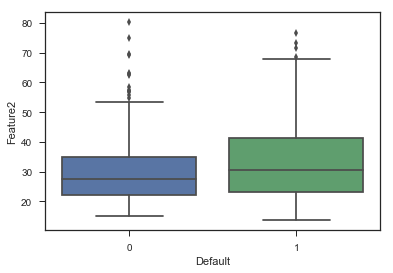

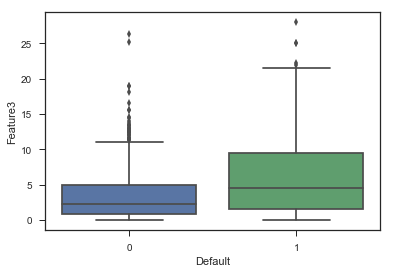

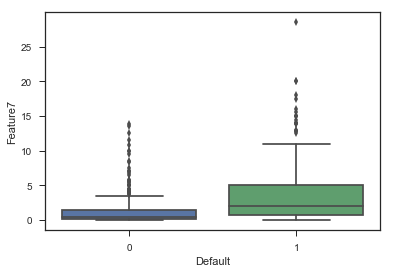

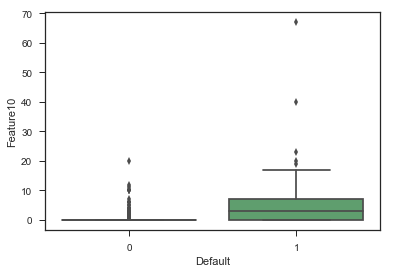

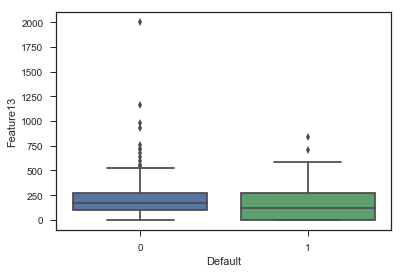

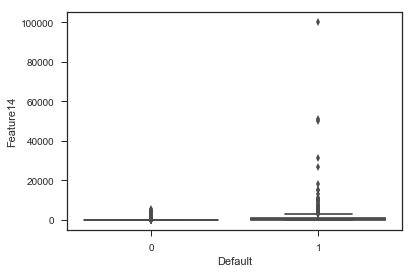

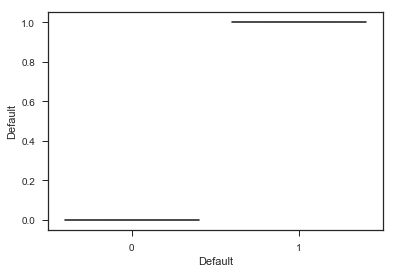

In [484]:
boxplots(aus,'Default')

#### Taiwan Data

In [485]:
# crosstabs and odds ratios for Taiwan data.
ctab_maker(taiwan, 'Default_Pmt')

Default_Pmt      0     1    All  sum1  other1   sum0  other0       num  \
SEX                                                                      
1             9015  2873  11888  6636    3763  23364   14349  0.763487   
2            14349  3763  18112  6636    2873  23364    9015  1.309781   
All          23364  6636  30000  6636       0  23364       0       inf   

Default_Pmt     denom  oddsratio  
SEX                               
1            0.628267   1.215227  
2            1.591681   0.822892  
All               inf        NaN

Default_Pmt      0     1    All  sum1  other1   sum0  other0       num  \
EDUCATION                                                                
0               14     0     14  6636    6636  23364   23350  0.000000   
1             8549  2036  10585  6636    4600  23364   14815  0.442609   
2            10700  3330  14030  6636    3306  23364   12664  1.007260   
3             3680  1237   4917  6636    5399  23364   19684  0.229117   
4              116     7    123  6636    6629  23364   23248  0.001056   
5              262    18    280  6636    6618  23364   23102  0.002720   
6               43     8     51  6636    6628  23364   23321  0.001207   
All          23364  6636  30000  6636       0  23364       0       inf   

Default_Pmt     denom  oddsratio  
EDUCATION                         
0            0.000600   0.000000  
1            0.577050   0.767019  
2            0.844915   1.192143  
3            0.186954   1.225524  
4            0.004990   0.211630  
5            0.011341   0.239825  
6            0.001844   0.654615  
All               inf        NaN

Default_Pmt      0     1    All  sum1  other1   sum0  other0       num  \
MARRIAGE                                                                 
0               49     5     54  6636    6631  23364   23315  0.000754   
1            10453  3206  13659  6636    3430  23364   12911  0.934694   
2            12623  3341  15964  6636    3295  23364   10741  1.013961   
3              239    84    323  6636    6552  23364   23125  0.012821   
All          23364  6636  30000  6636       0  23364       0       inf   

Default_Pmt     denom  oddsratio  
MARRIAGE                          
0            0.002102   0.358782  
1            0.809620   1.154485  
2            1.175216   0.862786  
3            0.010335   1.240478  
All               inf        NaN

The odds ratios for the Taiwan data show a bit of promise - specifically the education categories -- but not nearly as much as for the German and Australian datasets.

The boxplots below show some predictive power as well, especially the payment features. If a debtor is paying late (defined as a higher number of 'months late' for each payment month), the risk of default is elevated. 

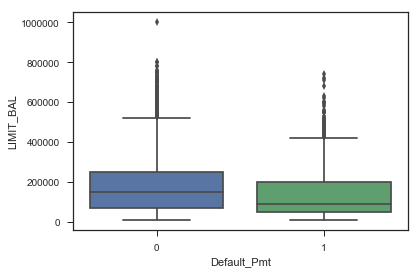

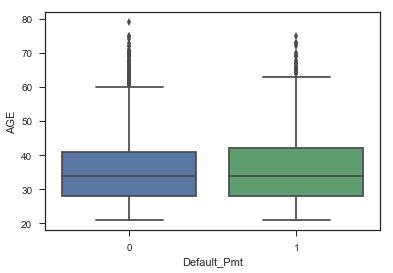

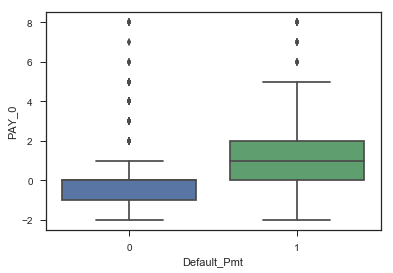

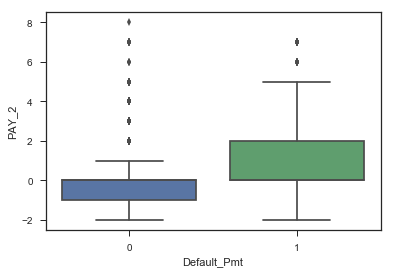

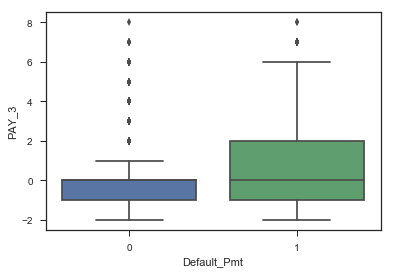

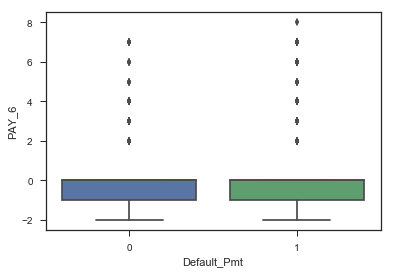

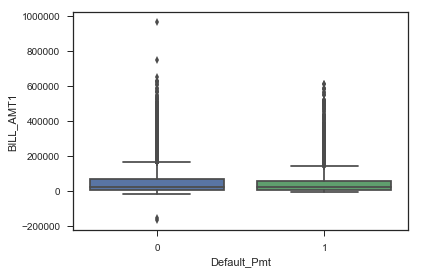

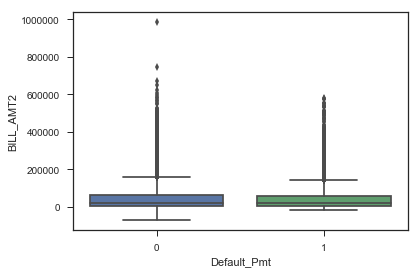

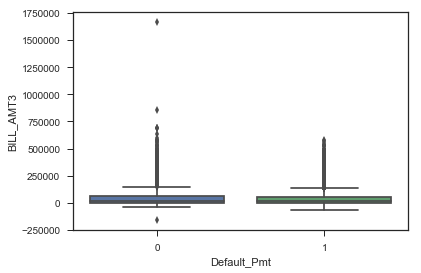

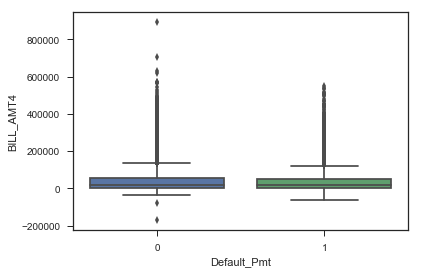

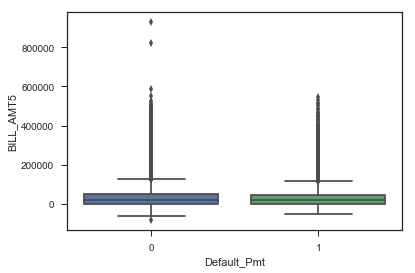

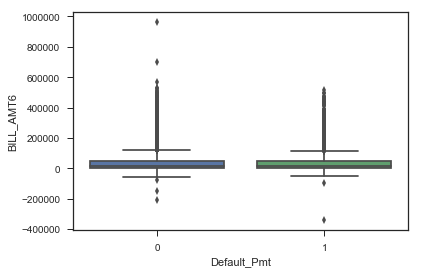

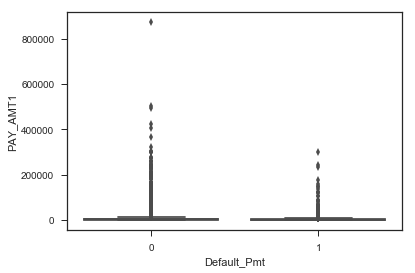

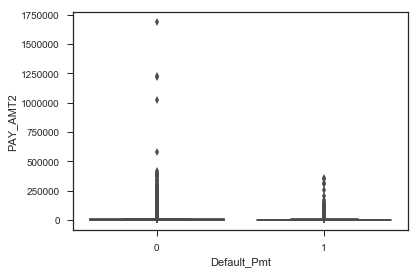

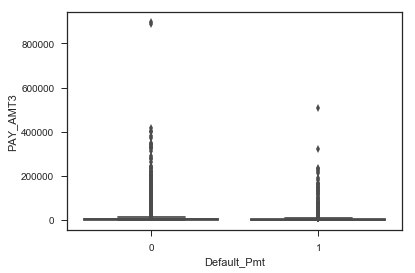

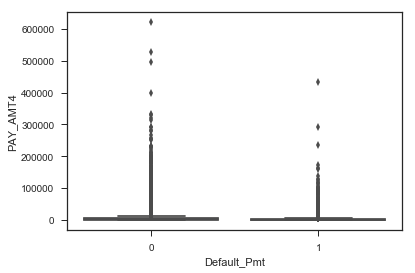

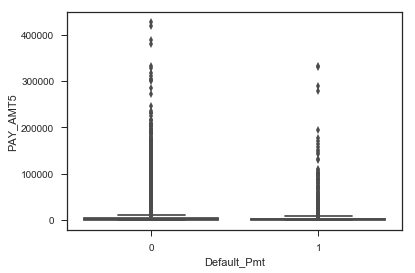

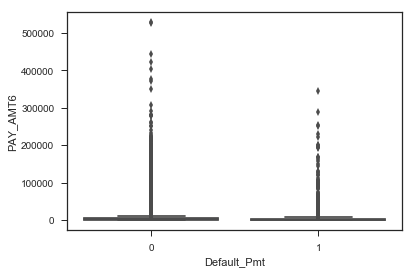

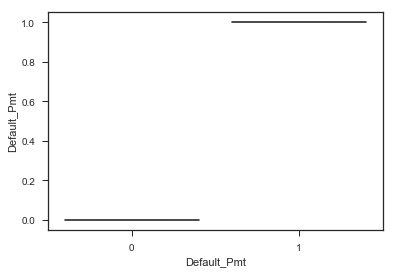

In [486]:
boxplots(taiwan,'Default_Pmt')

<a id='modelprep'></a>
## <b>IV. Model Preparation - Data Preprocessing</b>

Now that we've examined how the features appear to predict default for each of the datasets, it's time to put them into a few models and see how they do. To begin that process, we will do some preprocessing to make them easy to input: 

- One hot encoding the categorical features
- Scaling the numeric features to put them on a common basis
- Label encoding our default label
- Create train, validate, test sets

Below we execute these steps for each of the 3 datasets:

In [487]:
# import utilities to aid preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prep
from sklearn.preprocessing import OneHotEncoder

In [488]:
# check dataset contents - complete, looks good, commenting out
#display(german.dtypes)
#display(aus.dtypes)
#display(taiwan.dtypes)

In [489]:
# create one hot encodings for categorical variables
def cat_preproc(dataname,df):
    print('\n'+'Dataset: '+dataname)
    print('Creating dummy variables ...')

    df_cat = df.select_dtypes(include=['object'])
    print('Input shape for categorical features: '+str(df_cat.shape))

    dum_list = list(df_cat.columns.values) # features we want to convert
    dum_out = pd.get_dummies(data=df, columns=dum_list, drop_first=True) # create dummies
    print('Output shape for categorical features: '+str(dum_out.shape))    

    display(pd.DataFrame(dum_out).describe())

    return dum_out

In [490]:
# scale numeric data
def num_preproc(dataname,df,labelvar):
    df_num_feat = df.select_dtypes(exclude=['uint8']) # get dataframe of numeric features
    df_num = df_num_feat.drop(labelvar, axis=1) # remove label data
    num_list = list(df_num.columns.values) # list of features we want to convert    
    scaler = prep.StandardScaler() # define scaler
    df[num_list] = scaler.fit_transform(df[num_list]) # execute

    print('\n'+'Dataset: '+dataname)
    print('Scaling numeric variables ...')    
    print('Input shape for features: '+str(df_num.shape))
    print('Output shape for numeric features: '+str(df.shape))
    display(pd.DataFrame(df).describe())

    return df

In [491]:
# label encoding
def labenc(dataname,df,col):
    le = prep.LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df[col] = df[col].astype('category')

    return df

In [492]:
# combine preprocesing steps
def preproc(dataname,df,labelvar):
    catout = cat_preproc(dataname,df)
    numout = num_preproc(dataname,catout,labelvar)
    preproc_out = labenc(dataname,numout,labelvar)

    return preproc_out

In [493]:
# Preprocess our 3 datasets
german_pre = preproc('German',german,'Default')   
aus_pre = preproc('Australian',aus,'Default')
taiwan_pre = preproc('Taiwan',taiwan,'Default_Pmt')



Dataset: German
Creating dummy variables ...
Input shape for categorical features: (1000, 13)
Output shape for categorical features: (1000, 49)


Duration  Credit_Amount  Install_Rate    Res_Since      Age_Yrs  \
count  1000.000000    1000.000000   1000.000000  1000.000000  1000.000000   
mean     20.903000    3271.258000      2.973000     2.845000    35.546000   
std      12.058814    2822.736876      1.118715     1.103718    11.375469   
min       4.000000     250.000000      1.000000     1.000000    19.000000   
25%      12.000000    1365.500000      2.000000     2.000000    27.000000   
50%      18.000000    2319.500000      3.000000     3.000000    33.000000   
75%      24.000000    3972.250000      4.000000     4.000000    42.000000   
max      72.000000   18424.000000      4.000000     4.000000    75.000000   

       Bank_Credits   Dependents      Default  Checking_Status_A12  \
count   1000.000000  1000.000000  1000.000000          1000.000000   
mean       1.407000     1.155000     0.300000             0.269000   
std        0.577654     0.362086     0.458487             0.443662   
min        1.000000     1.000000     0.000000             0.000000   
25%        1.000000     1.000000     0.000000             0.000000   
50%        1.000000     1.000000     0.000000             0.000000   
75%        2.000000     1.000000     1.000000             1.000000   
max        4.000000     2.000000     1.000000             1.000000   

       Checking_Status_A13         ...           Property_A124  \
count          1000.000000         ...             1000.000000   
mean              0.063000         ...                0.154000   
std               0.243085         ...                0.361129   
min               0.000000         ...                0.000000   
25%               0.000000         ...                0.000000   
50%               0.000000         ...                0.000000   
75%               0.000000         ...                0.000000   
max               1.000000         ...                1.000000   

       Other_Inst_A142  Other_Inst_A143  Housing_A152  Housing_A153  \
count      1000.000000      1000.000000   1000.000000   1000.000000   
mean          0.047000         0.814000      0.713000      0.108000   
std           0.211745         0.389301      0.452588      0.310536   
min           0.000000         0.000000      0.000000      0.000000   
25%           0.000000         1.000000      0.000000      0.000000   
50%           0.000000         1.000000      1.000000      0.000000   
75%           0.000000         1.000000      1.000000      0.000000   
max           1.000000         1.000000      1.000000      1.000000   

        Job_A172     Job_A173     Job_A174  Telephone_A192  \
count  1000.0000  1000.000000  1000.000000     1000.000000   
mean      0.2000     0.630000     0.148000        0.404000   
std       0.4002     0.483046     0.355278        0.490943   
min       0.0000     0.000000     0.000000        0.000000   
25%       0.0000     0.000000     0.000000        0.000000   
50%       0.0000     1.000000     0.000000        0.000000   
75%       0.0000     1.000000     0.000000        1.000000   
max       1.0000     1.000000     1.000000        1.000000   

       Foreign_Worker_A202  
count          1000.000000  
mean              0.037000  
std               0.188856  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000  

[8 rows x 49 columns]


Dataset: German
Scaling numeric variables ...
Input shape for features: (1000, 7)
Output shape for numeric features: (1000, 49)


Duration  Credit_Amount  Install_Rate     Res_Since       Age_Yrs  \
count  1.000000e+03   1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.332268e-16   7.771561e-17  1.163965e-16 -3.117506e-16  3.597123e-17   
std    1.000500e+00   1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.402415e+00  -1.070865e+00 -1.764514e+00 -1.672459e+00 -1.455261e+00   
25%   -7.386675e-01  -6.754833e-01 -8.701833e-01 -7.659773e-01 -7.516417e-01   
50%   -2.408572e-01  -3.373443e-01  2.414692e-02  1.405047e-01 -2.239269e-01   
75%    2.569531e-01   2.484620e-01  9.184772e-01  1.046987e+00  5.676451e-01   
max    4.239436e+00   5.370789e+00  9.184772e-01  1.046987e+00  3.470076e+00   

       Bank_Credits    Dependents      Default  Checking_Status_A12  \
count  1.000000e+03  1.000000e+03  1000.000000          1000.000000   
mean  -5.928591e-17 -2.887690e-16     0.300000             0.269000   
std    1.000500e+00  1.000500e+00     0.458487             0.443662   
min   -7.049260e-01 -4.282896e-01     0.000000             0.000000   
25%   -7.049260e-01 -4.282896e-01     0.000000             0.000000   
50%   -7.049260e-01 -4.282896e-01     0.000000             0.000000   
75%    1.027079e+00 -4.282896e-01     1.000000             1.000000   
max    4.491089e+00  2.334869e+00     1.000000             1.000000   

       Checking_Status_A13         ...           Property_A124  \
count          1000.000000         ...             1000.000000   
mean              0.063000         ...                0.154000   
std               0.243085         ...                0.361129   
min               0.000000         ...                0.000000   
25%               0.000000         ...                0.000000   
50%               0.000000         ...                0.000000   
75%               0.000000         ...                0.000000   
max               1.000000         ...                1.000000   

       Other_Inst_A142  Other_Inst_A143  Housing_A152  Housing_A153  \
count      1000.000000      1000.000000   1000.000000   1000.000000   
mean          0.047000         0.814000      0.713000      0.108000   
std           0.211745         0.389301      0.452588      0.310536   
min           0.000000         0.000000      0.000000      0.000000   
25%           0.000000         1.000000      0.000000      0.000000   
50%           0.000000         1.000000      1.000000      0.000000   
75%           0.000000         1.000000      1.000000      0.000000   
max           1.000000         1.000000      1.000000      1.000000   

        Job_A172     Job_A173     Job_A174  Telephone_A192  \
count  1000.0000  1000.000000  1000.000000     1000.000000   
mean      0.2000     0.630000     0.148000        0.404000   
std       0.4002     0.483046     0.355278        0.490943   
min       0.0000     0.000000     0.000000        0.000000   
25%       0.0000     0.000000     0.000000        0.000000   
50%       0.0000     1.000000     0.000000        0.000000   
75%       0.0000     1.000000     0.000000        1.000000   
max       1.0000     1.000000     1.000000        1.000000   

       Foreign_Worker_A202  
count          1000.000000  
mean              0.037000  
std               0.188856  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000  

[8 rows x 49 columns]


Dataset: Australian
Creating dummy variables ...
Input shape for categorical features: (690, 8)
Output shape for categorical features: (690, 35)


Feature2    Feature3    Feature7  Feature10    Feature13  \
count  690.000000  690.000000  690.000000  690.00000   690.000000   
mean    31.568203    4.758725    2.223406    2.40000   184.014493   
std     11.853273    4.978163    3.346513    4.86294   172.159274   
min     13.750000    0.000000    0.000000    0.00000     0.000000   
25%     22.670000    1.000000    0.165000    0.00000    80.000000   
50%     28.625000    2.750000    1.000000    0.00000   160.000000   
75%     37.707500    7.207500    2.625000    3.00000   272.000000   
max     80.250000   28.000000   28.500000   67.00000  2000.000000   

           Feature14     Default  Feature1_1  Feature4_2  Feature4_3  \
count     690.000000  690.000000  690.000000  690.000000  690.000000   
mean     1018.385507    0.444928    0.678261    0.760870    0.002899   
std      5210.102598    0.497318    0.467482    0.426862    0.053799   
min         1.000000    0.000000    0.000000    0.000000    0.000000   
25%         1.000000    0.000000    0.000000    1.000000    0.000000   
50%         6.000000    0.000000    1.000000    1.000000    0.000000   
75%       396.500000    1.000000    1.000000    1.000000    0.000000   
max    100001.000000    1.000000    1.000000    1.000000    1.000000   

          ...       Feature6_4  Feature6_5  Feature6_7  Feature6_8  \
count     ...       690.000000  690.000000  690.000000   690.00000   
mean      ...         0.591304    0.085507    0.008696     0.20000   
std       ...         0.491949    0.279838    0.092912     0.40029   
min       ...         0.000000    0.000000    0.000000     0.00000   
25%       ...         0.000000    0.000000    0.000000     0.00000   
50%       ...         1.000000    0.000000    0.000000     0.00000   
75%       ...         1.000000    0.000000    0.000000     0.00000   
max       ...         1.000000    1.000000    1.000000     1.00000   

       Feature6_9  Feature8_1  Feature9_1  Feature11_1  Feature12_2  \
count  690.000000  690.000000  690.000000   690.000000   690.000000   
mean     0.011594    0.523188    0.427536     0.457971     0.905797   
std      0.107128    0.499824    0.495080     0.498592     0.292323   
min      0.000000    0.000000    0.000000     0.000000     0.000000   
25%      0.000000    0.000000    0.000000     0.000000     1.000000   
50%      0.000000    1.000000    0.000000     0.000000     1.000000   
75%      0.000000    1.000000    1.000000     1.000000     1.000000   
max      1.000000    1.000000    1.000000     1.000000     1.000000   

       Feature12_3  
count   690.000000  
mean      0.011594  
std       0.107128  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 35 columns]


Dataset: Australian
Scaling numeric variables ...
Input shape for features: (690, 6)
Output shape for numeric features: (690, 35)


Feature2      Feature3      Feature7     Feature10     Feature13  \
count  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02  6.900000e+02   
mean   1.325832e-16  3.024955e-17  7.111863e-17  1.705560e-17  3.089316e-17   
std    1.000725e+00  1.000725e+00  1.000725e+00  1.000725e+00  1.000725e+00   
min   -1.504321e+00 -9.566132e-01 -6.648767e-01 -4.938866e-01 -1.069637e+00   
25%   -7.512404e-01 -7.555902e-01 -6.155359e-01 -4.938866e-01 -6.046142e-01   
50%   -2.484831e-01 -4.037999e-01 -3.658414e-01 -4.938866e-01 -1.395912e-01   
75%    5.183168e-01  4.922602e-01  1.200908e-01  1.234717e-01  5.114411e-01   
max    4.110014e+00  4.672031e+00  7.857628e+00  1.329378e+01  1.055594e+01   

          Feature14     Default  Feature1_1  Feature4_2  Feature4_3  \
count  6.900000e+02  690.000000  690.000000  690.000000  690.000000   
mean   6.721676e-17    0.444928    0.678261    0.760870    0.002899   
std    1.000725e+00    0.497318    0.467482    0.426862    0.053799   
min   -1.954133e-01    0.000000    0.000000    0.000000    0.000000   
25%   -1.954133e-01    0.000000    0.000000    1.000000    0.000000   
50%   -1.944530e-01    0.000000    1.000000    1.000000    0.000000   
75%   -1.194481e-01    1.000000    1.000000    1.000000    0.000000   
max    1.901199e+01    1.000000    1.000000    1.000000    1.000000   

          ...       Feature6_4  Feature6_5  Feature6_7  Feature6_8  \
count     ...       690.000000  690.000000  690.000000   690.00000   
mean      ...         0.591304    0.085507    0.008696     0.20000   
std       ...         0.491949    0.279838    0.092912     0.40029   
min       ...         0.000000    0.000000    0.000000     0.00000   
25%       ...         0.000000    0.000000    0.000000     0.00000   
50%       ...         1.000000    0.000000    0.000000     0.00000   
75%       ...         1.000000    0.000000    0.000000     0.00000   
max       ...         1.000000    1.000000    1.000000     1.00000   

       Feature6_9  Feature8_1  Feature9_1  Feature11_1  Feature12_2  \
count  690.000000  690.000000  690.000000   690.000000   690.000000   
mean     0.011594    0.523188    0.427536     0.457971     0.905797   
std      0.107128    0.499824    0.495080     0.498592     0.292323   
min      0.000000    0.000000    0.000000     0.000000     0.000000   
25%      0.000000    0.000000    0.000000     0.000000     1.000000   
50%      0.000000    1.000000    0.000000     0.000000     1.000000   
75%      0.000000    1.000000    1.000000     1.000000     1.000000   
max      1.000000    1.000000    1.000000     1.000000     1.000000   

       Feature12_3  
count   690.000000  
mean      0.011594  
std       0.107128  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 35 columns]


Dataset: Taiwan
Creating dummy variables ...
Input shape for categorical features: (30000, 3)
Output shape for categorical features: (30000, 31)


LIMIT_BAL           AGE         PAY_0         PAY_2         PAY_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     35.485500     -0.016700     -0.133767     -0.166200   
std     129747.661567      9.217904      1.123802      1.197186      1.196868   
min      10000.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.000000      0.000000   
75%     240000.000000     41.000000      0.000000      0.000000      0.000000   
max    1000000.000000     79.000000      8.000000      8.000000      8.000000   

              PAY_4         PAY_5         PAY_6      BILL_AMT1      BILL_AMT2  \
count  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   
mean      -0.220667     -0.266200     -0.291100   51223.330900   49179.075167   
std        1.169139      1.133187      1.149988   73635.860576   71173.768783   
min       -2.000000     -2.000000     -2.000000 -165580.000000  -69777.000000   
25%       -1.000000     -1.000000     -1.000000    3558.750000    2984.750000   
50%        0.000000      0.000000      0.000000   22381.500000   21200.000000   
75%        0.000000      0.000000      0.000000   67091.000000   64006.250000   
max        8.000000      8.000000      8.000000  964511.000000  983931.000000   

           ...              SEX_2   EDUCATION_1   EDUCATION_2   EDUCATION_3  \
count      ...       30000.000000  30000.000000  30000.000000  30000.000000   
mean       ...           0.603733      0.352833      0.467667      0.163900   
std        ...           0.489129      0.477859      0.498962      0.370191   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           1.000000      0.000000      0.000000      0.000000   
75%        ...           1.000000      1.000000      1.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

        EDUCATION_4   EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.004100      0.009333      0.001700      0.455300      0.532133   
std        0.063901      0.096159      0.041197      0.498006      0.498975   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         MARRIAGE_3  
count  30000.000000  
mean       0.010767  
std        0.103204  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]


Dataset: Taiwan
Scaling numeric variables ...
Input shape for features: (30000, 20)
Output shape for numeric features: (30000, 31)


LIMIT_BAL           AGE         PAY_0         PAY_2         PAY_3  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   2.436569e-17 -7.286024e-17 -7.559566e-17 -1.586202e-15 -1.135055e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.213794e+00 -1.571479e+00 -1.764843e+00 -1.558876e+00 -1.532192e+00   
25%   -9.054983e-01 -8.120745e-01 -8.749911e-01 -7.235699e-01 -6.966635e-01   
50%   -2.118326e-01 -1.611565e-01  1.486052e-02  1.117361e-01  1.388648e-01   
75%    5.589071e-01  5.982479e-01  1.486052e-02  1.117361e-01  1.388648e-01   
max    6.416528e+00  4.720729e+00  7.133674e+00  6.794184e+00  6.823091e+00   

              PAY_4         PAY_5         PAY_6     BILL_AMT1     BILL_AMT2  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean  -3.630355e-15 -7.266021e-16 -4.965398e-15  3.868410e-17 -4.926489e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.521944e+00 -1.530046e+00 -1.486041e+00 -2.944312e+00 -1.671375e+00   
25%   -6.665987e-01 -6.475648e-01 -6.164517e-01 -6.473120e-01 -6.490466e-01   
50%    1.887461e-01  2.349165e-01  2.531374e-01 -3.916884e-01 -3.931159e-01   
75%    1.887461e-01  2.349165e-01  2.531374e-01  2.154919e-01  2.083271e-01   
max    7.031505e+00  7.294767e+00  7.209850e+00  1.240296e+01  1.313360e+01   

           ...              SEX_2   EDUCATION_1   EDUCATION_2   EDUCATION_3  \
count      ...       30000.000000  30000.000000  30000.000000  30000.000000   
mean       ...           0.603733      0.352833      0.467667      0.163900   
std        ...           0.489129      0.477859      0.498962      0.370191   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           1.000000      0.000000      0.000000      0.000000   
75%        ...           1.000000      1.000000      1.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

        EDUCATION_4   EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.004100      0.009333      0.001700      0.455300      0.532133   
std        0.063901      0.096159      0.041197      0.498006      0.498975   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         MARRIAGE_3  
count  30000.000000  
mean       0.010767  
std        0.103204  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]

In [494]:
#  Create train, validate, test sets
def splitter(dataname, data, label, test_size, test_size2):
    labels = data[label]
    features = data.drop(label, axis = 1)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state = 7798520)
    x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=test_size2, random_state = 8675309)

    # print dataset metrics
    print('Dataset: '+str(dataname))
    print('\n'+'Splitting into train, validate, and test sets . . . \n')
    print('There are %d training observations.' % len(x_train))
    print('There are %d validation observations.' % len(x_val))
    print('There are %d test observations.'% len(x_test))
    print('\n'+'Shape of the label datasets: \n'+'y_train: '+str(y_train.shape))
    print('y_val: '+str(y_val.shape))
    print('y_test: '+str(y_test.shape)+'\n')

    return x_train, x_test, x_val, y_train, y_test, y_val

In [495]:
# Do train, test, validate splilts for our 3 datasets
ger_x_train, ger_x_test, ger_x_val, ger_y_train, ger_y_test, ger_y_val = splitter(
    'German',german_pre,'Default',.2,.5)

aus_x_train, aus_x_test, aus_x_val, aus_y_train, aus_y_test, aus_y_val = splitter(
    'Australian',aus_pre,'Default',.23,.5)

tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val = splitter(
    'Taiwan',taiwan_pre,'Default_Pmt',.15,.5)

Dataset: German

Splitting into train, validate, and test sets . . . 

There are 800 training observations.
There are 100 validation observations.
There are 100 test observations.

Shape of the label datasets: 
y_train: (800,)
y_val: (100,)
y_test: (100,)

Dataset: Australian

Splitting into train, validate, and test sets . . . 

There are 531 training observations.
There are 80 validation observations.
There are 79 test observations.

Shape of the label datasets: 
y_train: (531,)
y_val: (80,)
y_test: (79,)

Dataset: Taiwan

Splitting into train, validate, and test sets . . . 

There are 25500 training observations.
There are 2250 validation observations.
There are 2250 test observations.

Shape of the label datasets: 
y_train: (25500,)
y_val: (2250,)
y_test: (2250,)



<a id='estimation1'></a>
## V. Model Estimation - First Round

Now we have relatively clean, preprocessed datasets, split into training, testing, and validation sets. We've done this for the German, Australian, and Taiwan datasets. We may need to do some additional feature engineering, but I'd like to start getting some benchmark models in place.

Here, we will start with  the model for logistic regression, as well as utilities for classification diagnostics and exporting the classification report to save in a pandas dataframe.

### Logistic Regression


In [496]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Build the logistic regression model
def log_mod(dataset,technique,x_train,x_test,x_val,y_train,y_test,y_val):
    # train model
    LogReg = LogisticRegression()
    tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
    grid = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring = 'accuracy', )
    grid.fit(x_train, y_train)  
    
    # create predictions: classes & probabilities
    y_pred_class = grid.predict(x_val)
    y_pred_prob = np.array(grid.predict_proba(x_val)[:,1])
    
    # diagnostics
    x, accscore = class_diag(y_val, y_pred_class, y_pred_prob)
    
    # add row to output report
    add_row = report_results_to_df(dataset,technique,x)
    acclist = [dataset, technique, accscore]
    return x, add_row, acclist
    

In [497]:
# Classification diagnostics

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def class_diag(y_val, y_pred_class, y_pred_prob):
    con_mat = confusion_matrix(y_val, y_pred_class) # confusion matrix
    print('Confusion Matrix: ')
    display(con_mat)

    print('\n'+'Accuracy Score: '+'\n')
    accscore = accuracy_score(y_val, y_pred_class)
    display(accscore)
    
    crpt = classification_report(y_val, y_pred_class) # classification report
    print('\n'+'Classification Report: '+'\n'+crpt)
    
    fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_prob) # roc curve
    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

    plt.figure(0) 
    plt.step(fpr, tpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(fpr, tpr, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC curve')

    average_precision = average_precision_score(y_val, y_pred_prob) # average precision
    display('Average precision-recall score: {0:0.2f}'.format(
        average_precision))

    precision, recall, _ = precision_recall_curve(y_val, y_pred_prob) # precision recall curve
    plt.figure(1)
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    
    return crpt, accscore

In [498]:
# Output classification report
# adapted from https://stackoverflow.com/questions/45003577/classification-report-in-sklearn

from sklearn.metrics import classification_report

def report_results_to_df(dataset,technique,report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[1]
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1_score'] = float(row_data[4])
        row['support'] = int(row_data[5])
        row['dataset'] = dataset
        row['technique'] = technique
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    
    return dataframe


In [499]:
# Create empty dataframes to store model accuracy results
columns = ['class','dataset', 'f1_score', 'precision','recall','support','technique']
results = pd.DataFrame(columns=columns)
results.drop(results.index, inplace=True)

accscore_columns = ['dataset', 'accuracy_score', 'technique']
acc_results = pd.DataFrame(columns=accscore_columns)
acc_results.drop(results.index, inplace=True)

Confusion Matrix: 


array([[54, 11],
       [15, 20]])


Accuracy Score: 



0.73999999999999999


Classification Report: 
             precision    recall  f1-score   support

          0       0.78      0.83      0.81        65
          1       0.65      0.57      0.61        35

avg / total       0.73      0.74      0.74       100



'Average precision-recall score: 0.69'

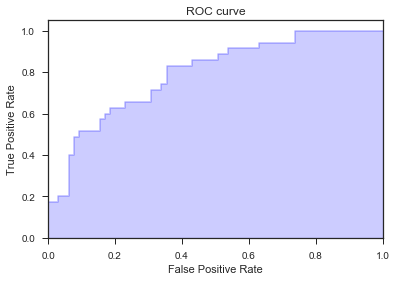

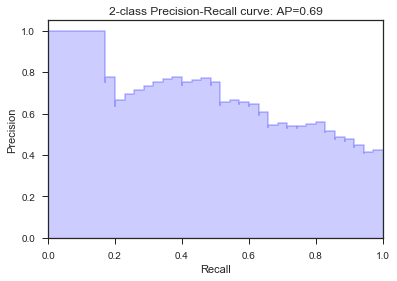

In [500]:
# Run the Logistic Regression model using the German data

x, mod_results, mod_acc = log_mod('Germany','Logistic',ger_x_train, ger_x_test, ger_x_val, ger_y_train, ger_y_test, ger_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


Confusion Matrix: 


array([[36,  4],
       [ 6, 34]])


Accuracy Score: 



0.875


Classification Report: 
             precision    recall  f1-score   support

          0       0.86      0.90      0.88        40
          1       0.89      0.85      0.87        40

avg / total       0.88      0.88      0.87        80



'Average precision-recall score: 0.96'

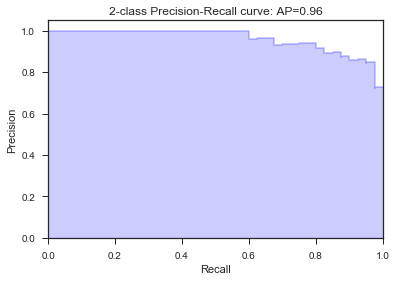

In [501]:
# Run the Logistic Regression model using the Australian data
x, mod_results, mod_acc = log_mod('Australia','Logistic',aus_x_train, aus_x_test, aus_x_val, aus_y_train, aus_y_test, aus_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


Confusion Matrix: 


array([[1682,   40],
       [ 397,  131]])


Accuracy Score: 



0.80577777777777781


Classification Report: 
             precision    recall  f1-score   support

          0       0.81      0.98      0.89      1722
          1       0.77      0.25      0.37       528

avg / total       0.80      0.81      0.77      2250



'Average precision-recall score: 0.54'

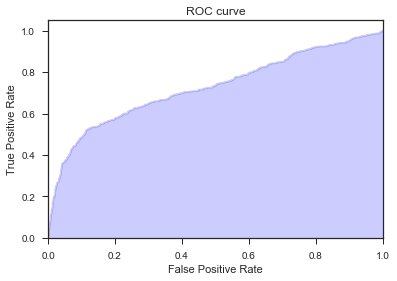

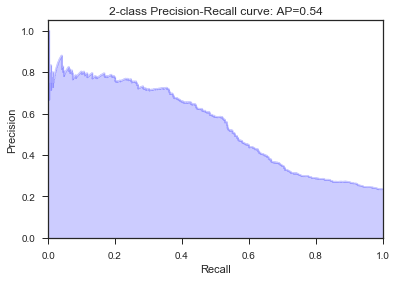

In [502]:
# Run the Logistic Regression model using the Taiwan data
x, mod_results, mod_acc = log_mod('Taiwan','Logistic',tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


### Classification Trees

In [503]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

def tree_mod(dataset, technique, x_train,x_test,x_val,y_train,y_test,y_val):
    tuned_parameters = {'max_depth': np.arange(3,20)}
    grid = GridSearchCV(DecisionTreeClassifier(criterion='gini'), tuned_parameters)
    grid.fit(x_train, y_train)    

    # create predictions: classes & probabilities
    y_pred_class = grid.predict(x_val)
    y_pred_prob = np.array(grid.predict_proba(x_val)[:,1])
    
    # diagnostics
    x, accscore = class_diag(y_val, y_pred_class, y_pred_prob)

    # add row to output report
    add_row = report_results_to_df(dataset,technique,x)
    acclist = [dataset, technique, accscore]

    return x, add_row, acclist

Confusion Matrix: 


array([[60,  5],
       [27,  8]])


Accuracy Score: 



0.68000000000000005


Classification Report: 
             precision    recall  f1-score   support

          0       0.69      0.92      0.79        65
          1       0.62      0.23      0.33        35

avg / total       0.66      0.68      0.63       100



'Average precision-recall score: 0.51'

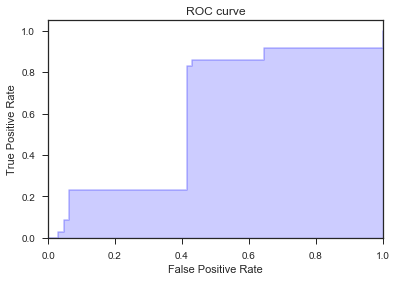

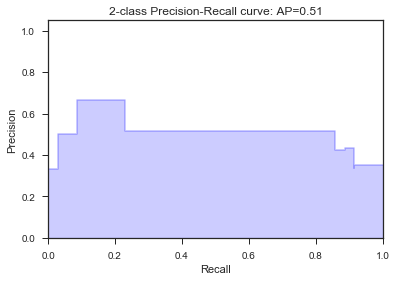

In [504]:
x, mod_results, mod_acc = tree_mod('Germany','Class Tree',ger_x_train, ger_x_test, ger_x_val, ger_y_train, ger_y_test, ger_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)




Confusion Matrix: 


array([[37,  3],
       [ 5, 35]])


Accuracy Score: 



0.90000000000000002


Classification Report: 
             precision    recall  f1-score   support

          0       0.88      0.93      0.90        40
          1       0.92      0.88      0.90        40

avg / total       0.90      0.90      0.90        80



'Average precision-recall score: 0.94'

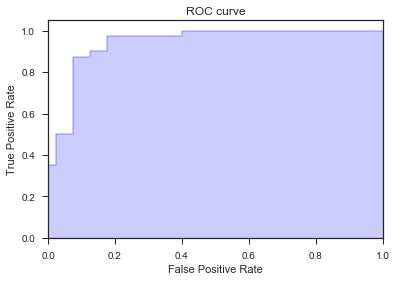

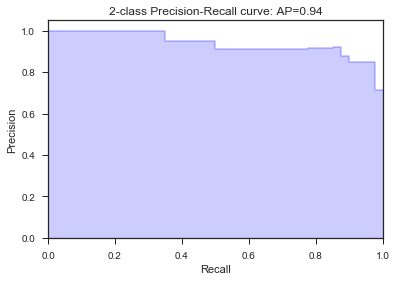

In [505]:
x, mod_results, mod_acc = tree_mod('Australia','Class Tree',aus_x_train, aus_x_test, aus_x_val, aus_y_train, aus_y_test, aus_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


Confusion Matrix: 


array([[1639,   83],
       [ 333,  195]])


Accuracy Score: 



0.81511111111111112


Classification Report: 
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      1722
          1       0.70      0.37      0.48       528

avg / total       0.80      0.82      0.79      2250



'Average precision-recall score: 0.50'

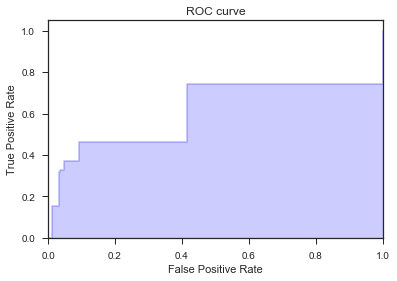

In [506]:
# Run the classification model using the Taiwan data
x, mod_results, mod_acc = tree_mod('Taiwan','Class Tree',tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


### Support Vector Machines

In [507]:
# As I was estimating the SVM, I couldn't get it to complete - it took forever. A little online research suggested
# using stochastic gradient descent to speed things up:
# https://stackoverflow.com/questions/23056460/does-the-svm-in-sklearn-support-incremental-online-learning
# Using sklearn's SGDClassifier with a "hinge" loss and L2 regularization will give us a faster SVM.

# Please note this SVM setup does not appear to allow for export of predicted probabilities, thus precision/recall 
# curves are built off of the predicted class only

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

def svm_mod(dataset,technique,x_train,x_test,x_val,y_train,y_test,y_val):
    param_grid = {'loss':['hinge'],
                  'penalty':['l2'],
                  'shuffle':[True]}
    sgdc = SGDClassifier(max_iter=100, tol=None)
    grid_search_sgdc = GridSearchCV(sgdc, param_grid=param_grid)
    grid_search_sgdc.fit(x_train, y_train)
    print(grid_search_sgdc.best_params_)
    print(grid_search_sgdc)

    # create predictions: classes & probabilities
    y_pred_class = grid_search_sgdc.predict(x_val)
    #y_pred_prob = np.array(grid_search_sgdc.predict_proba(x_val)[:,1])
    
    # diagnostics
    x, accscore = class_diag(y_val, y_pred_class, y_pred_class)

    # add row to output report
    add_row = report_results_to_df(dataset,technique,x)
    acclist = [dataset, technique, accscore]

    return x, add_row, acclist

In [508]:
# SVM classification on Germany data
x, mod_results, mod_acc = svm_mod('Germany','SVM',ger_x_train, ger_x_test, ger_x_val, ger_y_train, ger_y_test, ger_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


{'loss': 'hinge', 'penalty': 'l2', 'shuffle': True}
GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge'], 'penalty': ['l2'], 'shuffle': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Confusion Matrix: 


array([[59,  6],
       [20, 15]])


Accuracy Score: 



0.73999999999999999


Classification Report: 
             precision    recall  f1-score   support

          0       0.75      0.91      0.82        65
          1       0.71      0.43      0.54        35

avg / total       0.74      0.74      0.72       100



'Average precision-recall score: 0.51'

{'loss': 'hinge', 'penalty': 'l2', 'shuffle': True}
GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge'], 'penalty': ['l2'], 'shuffle': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Confusion Matrix: 


array([[35,  5],
       [ 1, 39]])


Accuracy Score: 



0.92500000000000004


Classification Report: 
             precision    recall  f1-score   support

          0       0.97      0.88      0.92        40
          1       0.89      0.97      0.93        40

avg / total       0.93      0.93      0.92        80



'Average precision-recall score: 0.88'

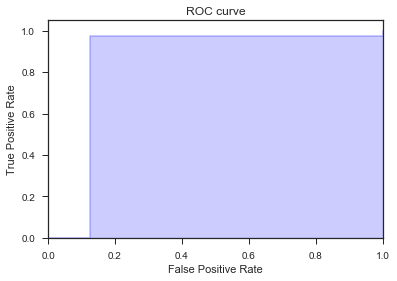

In [509]:
x, mod_results, mod_acc = svm_mod('Australia','SVM',aus_x_train, aus_x_test, aus_x_val, aus_y_train, aus_y_test, aus_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


{'loss': 'hinge', 'penalty': 'l2', 'shuffle': True}
GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge'], 'penalty': ['l2'], 'shuffle': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Confusion Matrix: 


array([[1682,   40],
       [ 403,  125]])


Accuracy Score: 



0.80311111111111111


Classification Report: 
             precision    recall  f1-score   support

          0       0.81      0.98      0.88      1722
          1       0.76      0.24      0.36       528

avg / total       0.80      0.80      0.76      2250



'Average precision-recall score: 0.36'

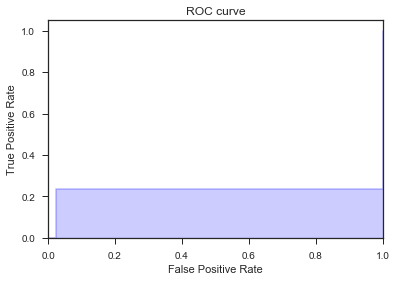

In [510]:
x, mod_results, mod_acc = svm_mod('Taiwan','SVM',tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val)
results = pd.concat([results, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


In [511]:
# Evaluation of accuracy results thus far

# Overall Classification Accuracy
print('\n'*2+'Overall Classification Accuracy Results from First Round:')
display(acc_results)

# average precision, recall, and f1_score by technique
class1_res = (results.loc[(results['class'].astype('int') == 1)])
print('\n'*2+'All Class Accuracy Results from First Round:')
display(class1_res)

table1 = pd.pivot_table(class1_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
print()
print('\n'*2+'Table 1'+'\n'+'Average Scores by Technique Across 3 Datasets:')
display(table1)

table2 = pd.pivot_table(class1_res, values=['precision','recall', 'f1_score'], index=['dataset'],aggfunc=np.mean)
print('\n'*2+'Table 2'+'\n'+'Average Scores by Dataset Across 3 Techniques:')
display(table2)





Overall Classification Accuracy Results from First Round:


dataset  accuracy_score   technique
0    Germany        0.740000    Logistic
1  Australia        0.875000    Logistic
2     Taiwan        0.805778    Logistic
3    Germany        0.680000  Class Tree
4  Australia        0.900000  Class Tree
5     Taiwan        0.815111  Class Tree
6    Germany        0.740000         SVM
7  Australia        0.925000         SVM
8     Taiwan        0.803111         SVM



All Class Accuracy Results from First Round:


class    dataset  f1_score  precision  recall support   technique
1      1    Germany      0.61       0.65    0.57      35    Logistic
1      1  Australia      0.87       0.89    0.85      40    Logistic
1      1     Taiwan      0.37       0.77    0.25     528    Logistic
1      1    Germany      0.33       0.62    0.23      35  Class Tree
1      1  Australia      0.90       0.92    0.88      40  Class Tree
1      1     Taiwan      0.48       0.70    0.37     528  Class Tree
1      1    Germany      0.54       0.71    0.43      35         SVM
1      1  Australia      0.93       0.89    0.97      40         SVM
1      1     Taiwan      0.36       0.76    0.24     528         SVM




Table 1
Average Scores by Dataset Across 3 Datasets:


f1_score  precision    recall
technique                                
Class Tree  0.570000   0.746667  0.493333
Logistic    0.616667   0.770000  0.556667
SVM         0.610000   0.786667  0.546667



Table 2
Average Scores by Technique Across 3 Datasets:


f1_score  precision    recall
dataset                                 
Australia  0.900000   0.900000  0.900000
Germany    0.493333   0.660000  0.410000
Taiwan     0.403333   0.743333  0.286667

### Summary So Far

It's useful to pause here and summarize what we've learned so far about the results from the different techniques and datasets under study. Based on the business purpose, the most important metrics to look at are those associated with defaulters, here coded as 1's. So for example, a recall rate in Germany of 60% means the model was able to identify 60% of those who defaulted at the score cut point chosen by the model. For those companies that offer credit, this would still be considered very low, but let's start by saying we'd like this number to be as high as possible. Some observations:

- In table 1 in the above section, I have averaged the results of the the datasets by technique. On average, the highest performing technique was SVM (on both F1 score and recall), followed by logistic regression and classification trees. I would note that some of the techniques are reasonably close in performance, and that as I have randomly rerun this technique with the data randomized, sometimes the results do change in order. 

- The results differ strongly by dataset. In table 2 I have averaged across techniques by dataset. The Australian dataset performs best on F1 and recall -- despite no indication of what the features actually are. The German dataset is a distant second and the Taiwan dataset is last. The Taiwan data has a recall of less than 35%, which I would consider relatively poor.

- The Taiwan dataset is the most interesting due to its size, but performs worst. I could look further at optimizing the Taiwan model for recall by tightening the model score I'm willing to accept to extend credit. But I also know that some of the data in the Taiwan dataset -- billing amounts, payment amounts, and payment timing -- are not well used in these models. Those data have a time series elements to them, like trends, that probably are not captured in the existing features. 

Thus the next thing I'm going to do is some feature engineering to extract information from these raw features and see if it improves results.

<a id='feature_engineering'></a>
## VI. Engineering New Features for a Second Round of Models

In the Taiwan dataset, there are three sets of features that are inherently time series -- pay codes, bill amounts and payment amounts. They show, over about a six month period, how and when a customer is using their credit and paying it off. Pay codes show whether or not a customer pays early, on time, or late. The bill amount shows how the customer's balance is changing over time. And payment amount shows how much they are paying off.

The models above treat each of these features as unrelated to the others in the time series. Each model has no way of knowing, for example, that a payment delay a few months ago might lead to default later on. The RNN we will use later on may be able to handle this implicitly, but for the models above we will have to engineer some new features to extract the desired information. More specifically, below I aim to calculate:

1. Counts of late, on-time, and early payments made by each customer
2. The maximum amount of time a payment was late
3. A sum of the count of months late, where we cumulate how many months were late over time
4. Billed amount as a percent of credit amount
5. Payment amount as a percent of billed amount
6. The average an maximum of (4) and (5)
7. The trend over time of (4) and (5)

The code below generates these new features on the imported Taiwan dataset and then reprocesses the dataset to prepare it for model estimation.


In [512]:
# Feature Engineering -- extracting information from payment timing in Taiwan dataset

# find locations of columns used in calculation
a = taiwan.columns.get_loc('PAY_0')
b = taiwan.columns.get_loc('PAY_6')
pay_code_features = list(taiwan.columns[a:b+1])

def count_late(row):
    num_late = 0
    for col in pay_code_features:
        if row[col] > 0:
            num_late += 1

    return num_late

def count_early(row):
    num_early = 0
    for col in pay_code_features:
        if row[col] < -1:
            num_early += 1

    return num_early

def on_time(row):
    num_ontime = 0
    for col in pay_code_features:
        if row[col] in (0,-1):
            num_ontime += 1

    return num_ontime

def max_late(row):
    maxlate = 0
    for col in pay_code_features:
        if row[col] > maxlate:
            maxlate = row[col]

    return maxlate

def months_late(row):
    monthslate = 0
    for col in pay_code_features:
        if row[col] > 0:
            monthslate += row[col]

    return monthslate

taiwan_s = taiwan.assign(lates=taiwan.apply(count_late, axis=1))
taiwan_s = taiwan_s.assign(earlies=taiwan_s.apply(count_early, axis=1))
taiwan_s = taiwan_s.assign(ontimes=taiwan_s.apply(on_time, axis=1))
taiwan_s = taiwan_s.assign(maxlate=taiwan_s.apply(max_late, axis=1))
taiwan_s = taiwan_s.assign(monthslate=taiwan_s.apply(months_late, axis=1))


In [513]:
# print some of the default records, with the original and calculated features
display(taiwan_s[list(taiwan_s.columns[6:12]) + list(taiwan_s.columns[12:])][taiwan_s['Default_Pmt'] == 1].head(5))
taiwan_s.info()

PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
0       2     -1     -1     -2     -2       3913       3102        689   
1       2      0      0      0      2       2682       1725       2682   
13      2      2      0      0      2      65802      67369      65701   
16      0      2      2      2      2      15376      18010      17428   
21     -1     -1     -1     -1     -1        316        316        316   

    BILL_AMT4  BILL_AMT5     ...      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0           0          0     ...             0         0         0         0   
1        3272       3455     ...          1000      1000         0      2000   
13      66782      36137     ...          3000      3000      1500         0   
16      18338      17905     ...          1500         0      1650         0   
21          0        632     ...             0       632       316         0   

    Default_Pmt  lates  earlies  ontimes  maxlate  monthslate  
0             1      2        2        2        2           4  
1             1      2        0        4        2           4  
13            1      4        0        2        2           7  
16            1      4        0        2        2           8  
21            1      0        0        6        0           0  

[5 rows x 23 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
LIMIT_BAL      30000 non-null int64
SEX            30000 non-null object
EDUCATION      30000 non-null object
MARRIAGE       30000 non-null object
AGE            30000 non-null int64
PAY_0          30000 non-null int64
PAY_2          30000 non-null int64
PAY_3          30000 non-null int64
PAY_4          30000 non-null int64
PAY_5          30000 non-null int64
PAY_6          30000 non-null int64
BILL_AMT1      30000 non-null int64
BILL_AMT2      30000 non-null int64
BILL_AMT3      30000 non-null int64
BILL_AMT4      30000 non-null int64
BILL_AMT5      30000 non-null int64
BILL_AMT6      30000 non-null int64
PAY_AMT1       30000 non-null int64
PAY_AMT2       30000 non-null int64
PAY_AMT3       30000 non-null int64
PAY_AMT4       30000 non-null int64
PAY_AMT5       30000 non-null int64
PAY_AMT6       30000 non-null int64
Default_Pmt    30000 non-null int64
lates          30000 non

In [514]:
# Feature Engineering of Billing Amounts, Payment Amounts and Limit
# Preprocessing step

def dollar_features(df):

    # find locations of columns used in calculation
    a = df.columns.get_loc('BILL_AMT1')
    b = df.columns.get_loc('BILL_AMT6')
    c = df.columns.get_loc('PAY_AMT1')
    d = df.columns.get_loc('PAY_AMT6')

    bill_amt_features = list(df.columns[a:b+1]) # list of billed amount features
    pay_amt_features = list(df.columns[c:d+1]) # list of pay amount features

    # Create features: bill as pct of limit
    for col in bill_amt_features:
        df[col+'_LIMPCT'] = df[col]/df['LIMIT_BAL']

    # Create features: pmt amt as pct of bill
    for paycol in pay_amt_features:
        for billcol in bill_amt_features:
            if pay_amt_features.index(paycol) == bill_amt_features.index(billcol):
                    df[paycol+'_PCT_BILL'] = df[paycol]/df[billcol]   

    # Consider case of 'inf' where pmt is made despite zero balance
    # We will "reward" consumer with a 1
    for column in df:
        df[column].replace(np.inf, 1, inplace=True)

    # Consider case of 'NaN' which results from 0/0 -- no payment where none is due
    # Will fill with a the mean of the series to indicate no variation for use by models 1 
    for column in df:
        df[column].fillna(df[column].mean(), inplace=True)                     

    # Checking results
    #display(df.describe())

    # Create lists of new features for summary statistics generation
    a = df.columns.get_loc('BILL_AMT1_LIMPCT')
    b = df.columns.get_loc('BILL_AMT6_LIMPCT')
    c = df.columns.get_loc('PAY_AMT1_PCT_BILL')
    d = df.columns.get_loc('PAY_AMT6_PCT_BILL')

    bill_pct_lim_features = list(df.columns[a:b+1]) 
    pmt_pct_bill_features = list(df.columns[c:d+1]) 
    
    return df,  bill_amt_features, pay_amt_features, bill_pct_lim_features, pmt_pct_bill_features

taiwan_s, bill_amt_features, pay_amt_features, bill_pct_lim_features, pmt_pct_bill_features = dollar_features(taiwan_s)

In [515]:
# Functions to calculate averages, maximums, trends

# Find the maximum pct of limit
def max_pct_lim(row):
    maxpct = 0
    for col in bill_pct_lim_features:
        if row[col] > maxpct:
            maxpct = row[col]

    return maxpct

# Find the average pct of limit
def avg_pct_lim(row):
    sumpct = 0
    avgpct = 0
    n = 0
    for col in bill_pct_lim_features:
        sumpct = sumpct + row[col]
        n += 1
        avgpct = sumpct / n
        
    return avgpct

# Find the maximum pay as pct of bill
def max_pct_bill(row):
    maxpct = 0
    for col in pmt_pct_bill_features:
        if row[col] > maxpct:
            maxpct = row[col]

    return maxpct

# Find the average pay as pct of bill
def avg_pct_bill(row):
    sumpct = 0
    avgpct = 0
    n = 0
    for col in pmt_pct_bill_features:
        sumpct = sumpct + row[col]
        n += 1
        avgpct = sumpct / n

    return avgpct

# Find the trends over bill as pct of limit and pay as pct of bill

def trend(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]

    return float(slope)

def trend_bill(row):
    datalist = []
    indexer = []
    i = 0
    for col in bill_pct_lim_features:
        datalist.append(row[col])
        i += 1
        indexer.append(i)
    df = pd.DataFrame({'indexer': indexer, 'datalist': datalist})
    x = trend(df['datalist'])

    return x

def trend_pay(row):
    datalist = []
    indexer = []
    i = 0
    for col in pmt_pct_bill_features:
        datalist.append(row[col])
        i += 1
        indexer.append(i)
    df = pd.DataFrame({'indexer': indexer, 'datalist': datalist})
    x = trend(df['datalist'])

    return x

In [516]:
# Execute new metric calculation

def metrics_calc(inp):
    outp = inp.assign(maxpctlim=inp.apply(max_pct_lim, axis=1))
    outp = outp.assign(avgpctlim=outp.apply(avg_pct_lim, axis=1))
    outp = outp.assign(maxpctbill=outp.apply(max_pct_bill, axis=1))
    outp = outp.assign(avgpctbill=outp.apply(avg_pct_bill, axis=1))
    outp = outp.assign(trendbill=outp.apply(trend_bill, axis=1))
    outp = outp.assign(trendpay=outp.apply(trend_pay, axis=1))

    return outp

taiwan_s = metrics_calc(taiwan_s)


In [517]:
# Inspect Output
display(taiwan_s.head(5)) # are all features filled in, and calculations look correct? Yes
display(taiwan_s.describe()) # are there any NaN or inf left? No.
display(taiwan_s.dtypes) # what are the data types? how much re-processing do I have to do?

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5    ...     PAY_AMT3_PCT_BILL  PAY_AMT4_PCT_BILL  PAY_AMT5_PCT_BILL  \
0     -2    ...              0.000000          -1.523270          -0.789927   
1      0    ...              0.372856           0.305623           0.000000   
2      0    ...              0.073752           0.069779           0.066899   
3      0    ...              0.024345           0.038850           0.036914   
4      0    ...              0.279057           0.429799           0.035987   

   PAY_AMT6_PCT_BILL  maxpctlim  avgpctlim  maxpctbill  avgpctbill  trendbill  \
0          -0.648350   0.195650   0.064200    0.222115   -0.456572  -0.042229   
1           0.613309   0.028792   0.023718    0.613309    0.311916   0.002065   
2           0.321564   0.324878   0.188246    0.321564    0.115141  -0.020608   
3           0.033844   0.985820   0.771113    0.042562    0.036396  -0.094865   
4           0.035492   0.716700   0.364463    6.469312    1.246958   0.044630   

   trendpay  
0 -0.222890  
1  0.036005  
2  0.034976  
3 -0.001255  
4 -0.575208  

[5 rows x 47 columns]

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

           ...       PAY_AMT3_PCT_BILL  PAY_AMT4_PCT_BILL  PAY_AMT5_PCT_BILL  \
count      ...            30000.000000       30000.000000       30000.000000   
mean       ...               -6.685849          -1.523270          -0.789927   
std        ...              602.023610         145.550643          65.828256   
min        ...           -82150.000000      -17266.666667       -7483.947368   
25%        ...                0.020021           0.014194           0.015210   
50%        ...                0.043667           0.039223           0.041399   
75%        ...                0.194809           0.166067           0.194276   
max        ...             6333.333333        8891.357143        1738.424242   

       PAY_AMT6_PCT_BILL     maxpctlim     avgpctlim    maxpctbill  \
count       30000.000000  30000.000000  30000.000000  30000.000000   
mean           -0.648350      0.494981      0.373048      7.069370   
std            80.582358      0.433027      0.351890    118.315255   
min        -11349.571429      0.000000     -0.232590      0.000000   
25%             0.000123      0.070636      0.029997      0.066820   
50%             0.040878      0.430702      0.284834      0.217928   
75%             0.203711      0.923246      0.687929      2.000000   
max          2643.330000     10.688575      5.364308  11453.666667   

         avgpctbill     trendbill      trendpay  
count  30000.000000  30000.000000  30000.000000  
mean      -2.292815     -0.022648      0.472147  
std      114.500659      0.063507     40.602962  
min   -13727.477930     -1.166823  -1636.255034  
25%        0.036437     -0.037855     -0.028812  
50%        0.061116     -0.001539     -0.001162  
75%        0.610504      0.005945      0.033954  
max     3703.611111      0.462580   5062.975039  

[8 rows x 47 columns]

LIMIT_BAL              int64
SEX                    int64
EDUCATION              int64
MARRIAGE               int64
AGE                    int64
PAY_0                  int64
PAY_2                  int64
PAY_3                  int64
PAY_4                  int64
PAY_5                  int64
PAY_6                  int64
BILL_AMT1              int64
BILL_AMT2              int64
BILL_AMT3              int64
BILL_AMT4              int64
BILL_AMT5              int64
BILL_AMT6              int64
PAY_AMT1               int64
PAY_AMT2               int64
PAY_AMT3               int64
PAY_AMT4               int64
PAY_AMT5               int64
PAY_AMT6               int64
Default_Pmt            int64
lates                  int64
earlies                int64
ontimes                int64
maxlate                int64
monthslate             int64
BILL_AMT1_LIMPCT     float64
BILL_AMT2_LIMPCT     float64
BILL_AMT3_LIMPCT     float64
BILL_AMT4_LIMPCT     float64
BILL_AMT5_LIMPCT     float64
BILL_AMT6_LIMP

In [518]:
# Reprocess Taiwan data with the new features

# Reclassify as object data types
objcol = ['SEX','EDUCATION','MARRIAGE']
objmaker(taiwan_s,objcol)
display(taiwan_s[['SEX','EDUCATION','MARRIAGE']].dtypes) 

# Rerun preprocessing routines
taiwan_pre = preproc('Taiwan',taiwan_s,'Default_Pmt')
#display(taiwan_pre.dtypes)

# Recreate train, test, and validation sets on Taiwan dataset
tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val = splitter(
    'Taiwan',taiwan_pre,'Default_Pmt',.1,.5)


SEX          object
EDUCATION    object
MARRIAGE     object
dtype: object


Dataset: Taiwan
Creating dummy variables ...
Input shape for categorical features: (30000, 3)
Output shape for categorical features: (30000, 54)


LIMIT_BAL           AGE         PAY_0         PAY_2         PAY_3  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     35.485500     -0.016700     -0.133767     -0.166200   
std     129747.661567      9.217904      1.123802      1.197186      1.196868   
min      10000.000000     21.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     28.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000     34.000000      0.000000      0.000000      0.000000   
75%     240000.000000     41.000000      0.000000      0.000000      0.000000   
max    1000000.000000     79.000000      8.000000      8.000000      8.000000   

              PAY_4         PAY_5         PAY_6      BILL_AMT1      BILL_AMT2  \
count  30000.000000  30000.000000  30000.000000   30000.000000   30000.000000   
mean      -0.220667     -0.266200     -0.291100   51223.330900   49179.075167   
std        1.169139      1.133187      1.149988   73635.860576   71173.768783   
min       -2.000000     -2.000000     -2.000000 -165580.000000  -69777.000000   
25%       -1.000000     -1.000000     -1.000000    3558.750000    2984.750000   
50%        0.000000      0.000000      0.000000   22381.500000   21200.000000   
75%        0.000000      0.000000      0.000000   67091.000000   64006.250000   
max        8.000000      8.000000      8.000000  964511.000000  983931.000000   

           ...              SEX_2   EDUCATION_1   EDUCATION_2   EDUCATION_3  \
count      ...       30000.000000  30000.000000  30000.000000  30000.000000   
mean       ...           0.603733      0.352833      0.467667      0.163900   
std        ...           0.489129      0.477859      0.498962      0.370191   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           1.000000      0.000000      0.000000      0.000000   
75%        ...           1.000000      1.000000      1.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

        EDUCATION_4   EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.004100      0.009333      0.001700      0.455300      0.532133   
std        0.063901      0.096159      0.041197      0.498006      0.498975   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         MARRIAGE_3  
count  30000.000000  
mean       0.010767  
std        0.103204  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 54 columns]


Dataset: Taiwan
Scaling numeric variables ...
Input shape for features: (30000, 43)
Output shape for numeric features: (30000, 54)


LIMIT_BAL           AGE         PAY_0         PAY_2         PAY_3  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean   2.436569e-17 -7.286024e-17 -7.559566e-17 -1.586202e-15 -1.135055e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.213794e+00 -1.571479e+00 -1.764843e+00 -1.558876e+00 -1.532192e+00   
25%   -9.054983e-01 -8.120745e-01 -8.749911e-01 -7.235699e-01 -6.966635e-01   
50%   -2.118326e-01 -1.611565e-01  1.486052e-02  1.117361e-01  1.388648e-01   
75%    5.589071e-01  5.982479e-01  1.486052e-02  1.117361e-01  1.388648e-01   
max    6.416528e+00  4.720729e+00  7.133674e+00  6.794184e+00  6.823091e+00   

              PAY_4         PAY_5         PAY_6     BILL_AMT1     BILL_AMT2  \
count  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04  3.000000e+04   
mean  -3.630355e-15 -7.266021e-16 -4.965398e-15  3.868410e-17 -4.926489e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -1.521944e+00 -1.530046e+00 -1.486041e+00 -2.944312e+00 -1.671375e+00   
25%   -6.665987e-01 -6.475648e-01 -6.164517e-01 -6.473120e-01 -6.490466e-01   
50%    1.887461e-01  2.349165e-01  2.531374e-01 -3.916884e-01 -3.931159e-01   
75%    1.887461e-01  2.349165e-01  2.531374e-01  2.154919e-01  2.083271e-01   
max    7.031505e+00  7.294767e+00  7.209850e+00  1.240296e+01  1.313360e+01   

           ...              SEX_2   EDUCATION_1   EDUCATION_2   EDUCATION_3  \
count      ...       30000.000000  30000.000000  30000.000000  30000.000000   
mean       ...           0.603733      0.352833      0.467667      0.163900   
std        ...           0.489129      0.477859      0.498962      0.370191   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           1.000000      0.000000      0.000000      0.000000   
75%        ...           1.000000      1.000000      1.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

        EDUCATION_4   EDUCATION_5   EDUCATION_6    MARRIAGE_1    MARRIAGE_2  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.004100      0.009333      0.001700      0.455300      0.532133   
std        0.063901      0.096159      0.041197      0.498006      0.498975   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         MARRIAGE_3  
count  30000.000000  
mean       0.010767  
std        0.103204  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 54 columns]

Dataset: Taiwan

Splitting into train, validate, and test sets . . . 

There are 27000 training observations.
There are 1500 validation observations.
There are 1500 test observations.

Shape of the label datasets: 
y_train: (27000,)
y_val: (1500,)
y_test: (1500,)



<a id='estimation2'></a>
## VII. Model Estimation - Round II - Taiwan Data

With these new features on the time series data, I will now re-estimate the logistic, classification, and SVM models and see how things improve.


In [519]:
# Create empty dataframe to store model results
columns = ['class','dataset', 'f1_score', 'precision','recall','support','technique']
resultsv2 = pd.DataFrame(columns=columns)
resultsv2.drop(resultsv2.index, inplace=True)

Confusion Matrix: 


array([[1089,   53],
       [ 258,  100]])


Accuracy Score: 



0.79266666666666663


Classification Report: 
             precision    recall  f1-score   support

          0       0.81      0.95      0.88      1142
          1       0.65      0.28      0.39       358

avg / total       0.77      0.79      0.76      1500



'Average precision-recall score: 0.51'

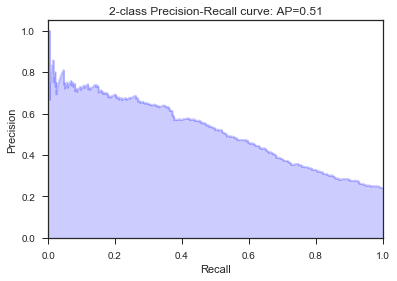

In [520]:
# ReRun the Logistic Regression model using the Taiwan data
x, mod_results, mod_acc = log_mod('Taiwan','Logistic 2',tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val)
resultsv2 = pd.concat([resultsv2, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


Confusion Matrix: 


array([[1090,   52],
       [ 242,  116]])


Accuracy Score: 



0.80400000000000005


Classification Report: 
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      1142
          1       0.69      0.32      0.44       358

avg / total       0.79      0.80      0.78      1500



'Average precision-recall score: 0.51'

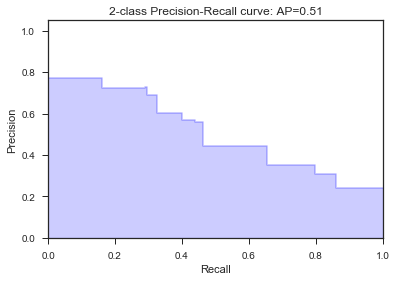

In [521]:
# ReRun the classification model using the Taiwan data
x, mod_results, mod_acc = tree_mod('Taiwan','Class Tree 2',tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val)
resultsv2 = pd.concat([resultsv2, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


{'loss': 'hinge', 'penalty': 'l2', 'shuffle': True}
GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge'], 'penalty': ['l2'], 'shuffle': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
Confusion Matrix: 


array([[1082,   60],
       [ 258,  100]])


Accuracy Score: 



0.78800000000000003


Classification Report: 
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      1142
          1       0.62      0.28      0.39       358

avg / total       0.76      0.79      0.76      1500



'Average precision-recall score: 0.35'

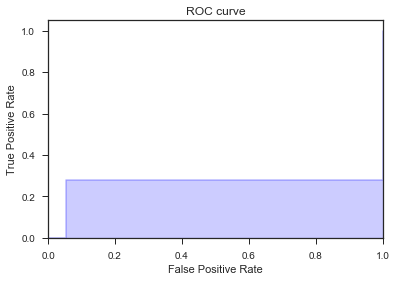

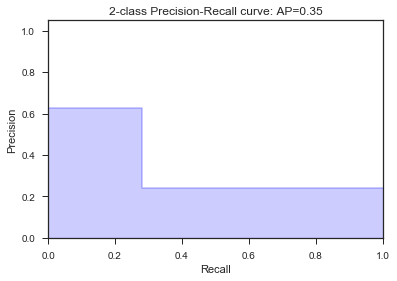

In [522]:
# ReRun the SVM model using the Taiwan data
# Please note this SVM setup does not appear to allow for export of predicted probabilities, thus precision/recall 
# curves are built off of the predicted class only

x, mod_results, mod_acc = svm_mod('Taiwan','SVM 2',tai_x_train, tai_x_test, tai_x_val, tai_y_train, tai_y_test, tai_y_val)
resultsv2 = pd.concat([resultsv2, mod_results])
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


In [523]:
# Evaluation of accuracy results thus far

# Overall Classification Accuracy
print('\n'*2+'Overall Classification Accuracy Results from First & Second Rounds:')
display(acc_results.loc[(acc_results["dataset"] == 'Taiwan')])

print('\n'+'All Results from 1st and 2nd rounds: Taiwan'+'\n')
display(results.loc[(results["dataset"] == 'Taiwan')])
display(resultsv2)

# average precision, recall, and f1_score by technique

print('\n'*2,'Class = 1 Results from the first round of models: Taiwan dataset'+'\n')
tw_res = (results.loc[(results["dataset"] == 'Taiwan') & (results['class'].astype('int') == 1)])
temp = pd.pivot_table(tw_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
display(temp)

print('\n')

print('Class = 1 Results from the 2nd round of models: Taiwan dataset'+'\n')
tw_res = (resultsv2.loc[(resultsv2["dataset"] == 'Taiwan') & (resultsv2['class'].astype('int') == 1)])
temp = pd.pivot_table(tw_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
display(temp)





Overall Classification Accuracy Results from First & Second Rounds:


dataset  accuracy_score     technique
2   Taiwan        0.805778      Logistic
5   Taiwan        0.815111    Class Tree
8   Taiwan        0.803111           SVM
9   Taiwan        0.792667    Logistic 2
10  Taiwan        0.804000  Class Tree 2
11  Taiwan        0.788000         SVM 2


All Results from 1st and 2nd rounds: Taiwan



class dataset  f1_score  precision  recall support   technique
0      0  Taiwan      0.89       0.81    0.98    1722    Logistic
1      1  Taiwan      0.37       0.77    0.25     528    Logistic
0      0  Taiwan      0.89       0.83    0.95    1722  Class Tree
1      1  Taiwan      0.48       0.70    0.37     528  Class Tree
0      0  Taiwan      0.88       0.81    0.98    1722         SVM
1      1  Taiwan      0.36       0.76    0.24     528         SVM

class dataset  f1_score  precision  recall support     technique
0      0  Taiwan      0.88       0.81    0.95    1142    Logistic 2
1      1  Taiwan      0.39       0.65    0.28     358    Logistic 2
0      0  Taiwan      0.88       0.82    0.95    1142  Class Tree 2
1      1  Taiwan      0.44       0.69    0.32     358  Class Tree 2
0      0  Taiwan      0.87       0.81    0.95    1142         SVM 2
1      1  Taiwan      0.39       0.62    0.28     358         SVM 2



 Class = 1 Results from the first round of models: Taiwan dataset



f1_score  precision  recall
technique                              
Class Tree      0.48       0.70    0.37
Logistic        0.37       0.77    0.25
SVM             0.36       0.76    0.24



Class = 1 Results from the 2nd round of models: Taiwan dataset



f1_score  precision  recall
technique                                
Class Tree 2      0.44       0.69    0.32
Logistic 2        0.39       0.65    0.28
SVM 2             0.39       0.62    0.28

Interestingly, the addition of additional features didn't really add any predictive power to the classification tree or SVM methods -- it seems to have made them worse! Recall score on the logistic regression method improved about 10%.

More careful feature selection methods might get us back to the original result, but it seems unlikely that all the feature engineering work done above will be able to add much to the raw information used in the first round of modeling.

<a id='mlp-taiwan'></a>
## VIII. MLP on Taiwan Dataset

Above we have completed two rounds of model estimation. In the first round, we estimated 3 model types on all three of our datasets, finding that they were reasonably close in performance but different strongly by dataset. For the second round, we found that feature engineering could substantially improve the performance of the logistic regression model, whereas the others were not much changed. For the Taiwan dataset, overall performance is still relatively poor, motivating us to ask if newer, more complex techniques would do better. Here, we will try an MLP model using not only the original features, but also the features we engineered in Round II above.

Here, I will use a network with 4 dense connected layers, each with batch normalization, a relu activation function, and dropout. The final prediction layer will use a sigmoid activation function.

In [524]:
# Get the shape of the input we'll need for the MLP
tai_x_train.shape

(27000, 53)

In [525]:
# define model using Keras
from keras.utils import np_utils
from keras.layers import Dropout, Flatten, Dense, Activation, BatchNormalization 
from keras.models import Sequential

model = Sequential()

model.add(Dense(100, input_shape=(53,), kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(100, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(50, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(50, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(25, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               5400      
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
__________

In [526]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])


In [527]:
from keras.callbacks import ModelCheckpoint, History
    
# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
    save_best_only=True)

hist = model.fit(tai_x_train, tai_y_train, batch_size=16, epochs=5,
    validation_data=(tai_x_test, tai_y_test), callbacks=[checkpointer], verbose=2, shuffle=True)


Train on 27000 samples, validate on 1500 samples
Epoch 1/5

Epoch 00001: val_loss improved from inf to 0.45039, saving model to MLP.weights.best.hdf5
 - 15s - loss: 0.4755 - acc: 0.7937 - val_loss: 0.4504 - val_acc: 0.8007
Epoch 2/5

Epoch 00002: val_loss did not improve
 - 11s - loss: 0.4604 - acc: 0.7970 - val_loss: 0.4508 - val_acc: 0.8113
Epoch 3/5

Epoch 00003: val_loss improved from 0.45039 to 0.44511, saving model to MLP.weights.best.hdf5
 - 11s - loss: 0.4556 - acc: 0.8006 - val_loss: 0.4451 - val_acc: 0.8180
Epoch 4/5

Epoch 00004: val_loss improved from 0.44511 to 0.44441, saving model to MLP.weights.best.hdf5
 - 11s - loss: 0.4539 - acc: 0.8009 - val_loss: 0.4444 - val_acc: 0.8173
Epoch 5/5

Epoch 00005: val_loss did not improve
 - 11s - loss: 0.4547 - acc: 0.8010 - val_loss: 0.4461 - val_acc: 0.8187


In [528]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

1500/1500 [==============================] - 0s 229us/step
Confusion Matrix: 


array([[1064,   78],
       [ 225,  133]])


Accuracy Score: 



0.79800000000000004


Classification Report: 
             precision    recall  f1-score   support

          0       0.83      0.93      0.88      1142
          1       0.63      0.37      0.47       358

avg / total       0.78      0.80      0.78      1500



'Average precision-recall score: 0.53'

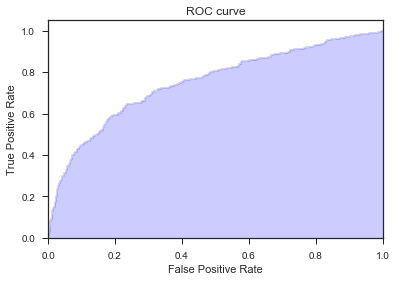

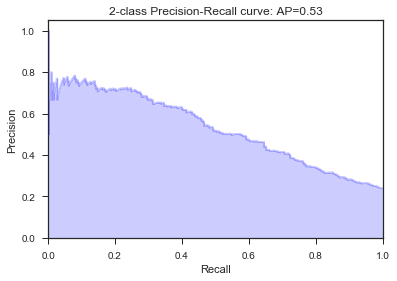

In [529]:
# Produce diagnostic reports 
y_pred_prob = model.predict_proba(tai_x_val, batch_size=32, verbose=1)
y_pred_class = model.predict_classes(tai_x_val)

report, accscore = class_diag(tai_y_val, y_pred_class, y_pred_prob)
mod_results = report_results_to_df('Taiwan','Neural Network',report)
resultsv2 = pd.concat([resultsv2, mod_results])
mod_acc = ['Taiwan','Neural Network', accscore]
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


In [530]:
# display Taiwan results from all estimations

# Overall Classification Accuracy
print('\n'*2+'Overall Classification Accuracy Results from All Rounds:')
display(acc_results.loc[(acc_results["dataset"] == 'Taiwan')])

print('\n'+'All Results from All rounds: Taiwan'+'\n')
display(results.loc[(results["dataset"] == 'Taiwan')])
display(resultsv2)

# average precision, recall, and f1_score by technique

print('\n'*2,'Class = 1 Results from the first round of models: Taiwan dataset'+'\n')
tw_res = (results.loc[(results["dataset"] == 'Taiwan') & (results['class'].astype('int') == 1)])
temp = pd.pivot_table(tw_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
display(temp)

print('\n')

print('Class = 1 Results from the 2nd round of models: Taiwan dataset'+'\n')
tw_res = (resultsv2.loc[(resultsv2["dataset"] == 'Taiwan') & (resultsv2['class'].astype('int') == 1)])
temp = pd.pivot_table(tw_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
display(temp)




Overall Classification Accuracy Results from All Rounds:


dataset  accuracy_score       technique
2   Taiwan        0.805778        Logistic
5   Taiwan        0.815111      Class Tree
8   Taiwan        0.803111             SVM
9   Taiwan        0.792667      Logistic 2
10  Taiwan        0.804000    Class Tree 2
11  Taiwan        0.788000           SVM 2
12  Taiwan        0.798000  Neural Network


All Results from All rounds: Taiwan



class dataset  f1_score  precision  recall support   technique
0      0  Taiwan      0.89       0.81    0.98    1722    Logistic
1      1  Taiwan      0.37       0.77    0.25     528    Logistic
0      0  Taiwan      0.89       0.83    0.95    1722  Class Tree
1      1  Taiwan      0.48       0.70    0.37     528  Class Tree
0      0  Taiwan      0.88       0.81    0.98    1722         SVM
1      1  Taiwan      0.36       0.76    0.24     528         SVM

class dataset  f1_score  precision  recall support       technique
0      0  Taiwan      0.88       0.81    0.95    1142      Logistic 2
1      1  Taiwan      0.39       0.65    0.28     358      Logistic 2
0      0  Taiwan      0.88       0.82    0.95    1142    Class Tree 2
1      1  Taiwan      0.44       0.69    0.32     358    Class Tree 2
0      0  Taiwan      0.87       0.81    0.95    1142           SVM 2
1      1  Taiwan      0.39       0.62    0.28     358           SVM 2
0      0  Taiwan      0.88       0.83    0.93    1142  Neural Network
1      1  Taiwan      0.47       0.63    0.37     358  Neural Network



 Class = 1 Results from the first round of models: Taiwan dataset



f1_score  precision  recall
technique                              
Class Tree      0.48       0.70    0.37
Logistic        0.37       0.77    0.25
SVM             0.36       0.76    0.24



Class = 1 Results from the 2nd round of models: Taiwan dataset



f1_score  precision  recall
technique                                  
Class Tree 2        0.44       0.69    0.32
Logistic 2          0.39       0.65    0.28
Neural Network      0.47       0.63    0.37
SVM 2               0.39       0.62    0.28

This Taiwan dataset has proven to be the most difficult one to predict default. Feature engineering above improved prediction for at least one method (logistic regression). When we provide our original features and engineered features to the MLP model, it appears to  outperform the other methods in the second round of estimations and come close to the best scores in the first.

But I would add that the use of the neural network model doesn't change the results by, say, an order of magnitude or even a factor of two. I would anticipate that through careful model construction, one might get it to be 10-20% better than other techniques overall.

<a id='rnn-taiwan'></a>
## IX. RNN - Sequence Model

The last technique I'd like to try is using a recurrent neural network, to take advantage of the time series nature of some of our features. 

In [531]:
# Prepare data for sequence model

# Extract lists of time series features
paycodelist = ['PAY_0', 'PAY_2' , 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']
billlist = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
paylist = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
billpctlist = ['BILL_AMT1_LIMPCT','BILL_AMT2_LIMPCT','BILL_AMT3_LIMPCT','BILL_AMT4_LIMPCT','BILL_AMT5_LIMPCT','BILL_AMT6_LIMPCT']
paypctlist = ['PAY_AMT1_PCT_BILL','PAY_AMT2_PCT_BILL','PAY_AMT3_PCT_BILL','PAY_AMT4_PCT_BILL','PAY_AMT5_PCT_BILL','PAY_AMT6_PCT_BILL']

# Subset our train, test, and validation sets to contain only those features
tai_x_lstm_train = pd.concat([tai_x_train[paycodelist], tai_x_train[billlist], tai_x_train[paylist],
    tai_x_train[billpctlist],tai_x_train[paypctlist]], axis = 1)

print('Train Shape before reshape: '+str(tai_x_lstm_train.shape))

tai_x_lstm_test = pd.concat([tai_x_test[paycodelist], tai_x_test[billlist], tai_x_test[paylist],
    tai_x_test[billpctlist],tai_x_test[paypctlist]], axis = 1)

print('Test Shape before reshape: '+str(tai_x_lstm_test.shape))


tai_x_lstm_val = pd.concat([tai_x_val[paycodelist], tai_x_val[billlist], tai_x_val[paylist],
    tai_x_val[billpctlist],tai_x_val[paypctlist]], axis = 1)

print('Val Shape before reshape: '+str(tai_x_lstm_val.shape))

print('\n')

# The LSTM layer expects input to be in a matrix with the dimensions: [samples, time steps, features].
tai_lstm_train_reshape = np.reshape(np.array(tai_x_lstm_train), (tai_x_lstm_train.shape[0],6,-1), order='F')
print('Train Shape after reshape: '+str(tai_lstm_train_reshape.shape))

tai_lstm_test_reshape = np.reshape(np.array(tai_x_lstm_test), (tai_x_lstm_test.shape[0],6,-1), order='F')
print('Test Shape after reshape: '+str(tai_lstm_test_reshape.shape))

tai_lstm_val_reshape = np.reshape(np.array(tai_x_lstm_val), (tai_x_lstm_val.shape[0],6,-1), order='F')
print('Val Shape after reshape: '+str(tai_lstm_val_reshape.shape))

# Data check
#display(np.array(tai_x_lstm_train[0:2]))
#display(tai_lstm_train_reshape[0:2])


Train Shape before reshape: (27000, 30)
Test Shape before reshape: (1500, 30)
Val Shape before reshape: (1500, 30)


Train Shape after reshape: (27000, 6, 5)
Test Shape after reshape: (1500, 6, 5)
Val Shape after reshape: (1500, 6, 5)


In [532]:
# Specify the RNN model

from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(6,5),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 100)            42400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 6, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 122,901
Trainable params: 122,901
Non-trainable params: 0
_________________________________________________________________
None


In [533]:
# Train the model
from keras.callbacks import ModelCheckpoint, History
    
checkpointer = ModelCheckpoint(filepath='RNN.weights.best.hdf5', verbose=1, 
    save_best_only=True)

hist = model.fit(tai_lstm_train_reshape, tai_y_train, batch_size=16, epochs=5,
    validation_data=(tai_lstm_test_reshape, tai_y_test), callbacks=[checkpointer], verbose=2, shuffle=True)


Train on 27000 samples, validate on 1500 samples
Epoch 1/5

Epoch 00001: val_loss improved from inf to 0.44713, saving model to RNN.weights.best.hdf5
 - 40s - loss: 0.4574 - acc: 0.8077 - val_loss: 0.4471 - val_acc: 0.8147
Epoch 2/5

Epoch 00002: val_loss improved from 0.44713 to 0.44312, saving model to RNN.weights.best.hdf5
 - 37s - loss: 0.4430 - acc: 0.8104 - val_loss: 0.4431 - val_acc: 0.8220
Epoch 3/5

Epoch 00003: val_loss did not improve
 - 37s - loss: 0.4394 - acc: 0.8133 - val_loss: 0.4492 - val_acc: 0.8173
Epoch 4/5

Epoch 00004: val_loss improved from 0.44312 to 0.44023, saving model to RNN.weights.best.hdf5
 - 36s - loss: 0.4367 - acc: 0.8164 - val_loss: 0.4402 - val_acc: 0.8233
Epoch 5/5

Epoch 00005: val_loss did not improve
 - 36s - loss: 0.4339 - acc: 0.8181 - val_loss: 0.4422 - val_acc: 0.8247


1500/1500 [==============================] - 1s 505us/step
Confusion Matrix: 


array([[1077,   65],
       [ 232,  126]])


Accuracy Score: 



0.80200000000000005


Classification Report: 
             precision    recall  f1-score   support

          0       0.82      0.94      0.88      1142
          1       0.66      0.35      0.46       358

avg / total       0.78      0.80      0.78      1500



'Average precision-recall score: 0.56'

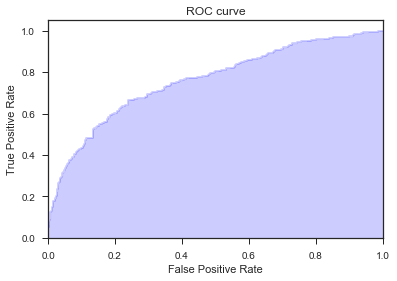

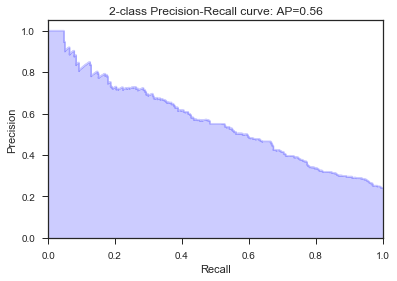

In [534]:
# Assessing Accuracy of RNN

# load the weights that yielded the best validation accuracy
model.load_weights('RNN.weights.best.hdf5')

# Produce diagnostic reports 
y_pred_prob = model.predict_proba(tai_lstm_val_reshape, batch_size=32, verbose=1)
y_pred_class = model.predict_classes(tai_lstm_val_reshape)

report, accscore = class_diag(tai_y_val, y_pred_class, y_pred_prob)
mod_results = report_results_to_df('Taiwan','RNN - LSTM',report)
resultsv2 = pd.concat([resultsv2, mod_results])
mod_acc = ['Taiwan','RNN - LSTM', accscore]
temp1 = pd.Series([mod_acc[0],mod_acc[2],mod_acc[1]], index = ['dataset','accuracy_score','technique'])
acc_results = acc_results.append(temp1, ignore_index=True)


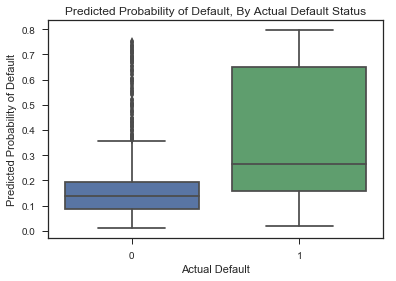

In [596]:
# Probability score analysis
t1 = np.ndarray.flatten(y_pred_class)
t2 = np.ndarray.flatten(y_pred_prob)
dft = pd.DataFrame({'y_val':tai_y_val, 'y_pred_class':t1, 'y_pred_prob':t2})

sns.boxplot(x='y_val', y='y_pred_prob', data=dft)
plt.title("Predicted Probability of Default, By Actual Default Status")
plt.xlabel("Actual Default")
plt.ylabel("Predicted Probability of Default")

fig = plt.gcf()

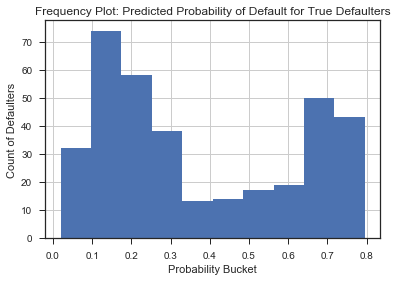

In [597]:
x = dft.loc[(dft['y_val'] == 1)]['y_pred_prob']
x.hist()
plt.title("Frequency Plot: Predicted Probability of Default for True Defaulters")
plt.xlabel("Probability Bucket")
plt.ylabel("Count of Defaulters")

fig = plt.gcf()

In [602]:
# Accuracy: display Taiwan results from all estimations

# Overall Classification Accuracy
print('\n'*2+'Overall Classification Accuracy Results from All Rounds:')
display(acc_results.loc[(acc_results["dataset"] == 'Taiwan')])

print('\n'+'All Results from All rounds: Taiwan'+'\n')
display(results.loc[(results["dataset"] == 'Taiwan')])
display(resultsv2)

# average precision, recall, and f1_score by technique

print('\n'*2,'Class = 1 Results from the first round of models: Taiwan dataset'+'\n')
tw_res = (results.loc[(results["dataset"] == 'Taiwan') & (results['class'].astype('int') == 1)])
temp = pd.pivot_table(tw_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
display(temp)

print('\n')

print('Class = 1 Results from the 2nd round of models: Taiwan dataset'+'\n')
tw_res = (resultsv2.loc[(resultsv2["dataset"] == 'Taiwan') & (resultsv2['class'].astype('int') == 1)])
temp = pd.pivot_table(tw_res, values=['precision','recall', 'f1_score'], index=['technique'],aggfunc=np.mean)
display(temp)



Overall Classification Accuracy Results from All Rounds:


dataset  accuracy_score       technique
1   Taiwan        0.805778        Logistic
4   Taiwan        0.815111      Class Tree
7   Taiwan        0.803111             SVM
8   Taiwan        0.792667      Logistic 2
9   Taiwan        0.804000    Class Tree 2
10  Taiwan        0.788000           SVM 2
11  Taiwan        0.798000  Neural Network
12  Taiwan        0.802000      RNN - LSTM


All Results from All rounds: Taiwan



class dataset  f1_score  precision  recall support   technique
0      0  Taiwan      0.89       0.81    0.98    1722    Logistic
1      1  Taiwan      0.37       0.77    0.25     528    Logistic
0      0  Taiwan      0.89       0.83    0.95    1722  Class Tree
1      1  Taiwan      0.48       0.70    0.37     528  Class Tree
0      0  Taiwan      0.88       0.81    0.98    1722         SVM
1      1  Taiwan      0.36       0.76    0.24     528         SVM

class dataset  f1_score  precision  recall support       technique
0      0  Taiwan      0.88       0.81    0.95    1142      Logistic 2
1      1  Taiwan      0.39       0.65    0.28     358      Logistic 2
0      0  Taiwan      0.88       0.82    0.95    1142    Class Tree 2
1      1  Taiwan      0.44       0.69    0.32     358    Class Tree 2
0      0  Taiwan      0.87       0.81    0.95    1142           SVM 2
1      1  Taiwan      0.39       0.62    0.28     358           SVM 2
0      0  Taiwan      0.88       0.83    0.93    1142  Neural Network
1      1  Taiwan      0.47       0.63    0.37     358  Neural Network
0      0  Taiwan      0.88       0.82    0.94    1142      RNN - LSTM
1      1  Taiwan      0.46       0.66    0.35     358      RNN - LSTM



 Class = 1 Results from the first round of models: Taiwan dataset



f1_score  precision  recall
technique                              
Class Tree      0.48       0.70    0.37
Logistic        0.37       0.77    0.25
SVM             0.36       0.76    0.24



Class = 1 Results from the 2nd round of models: Taiwan dataset



f1_score  precision  recall
technique                                  
Class Tree 2        0.44       0.69    0.32
Logistic 2          0.39       0.65    0.28
Neural Network      0.47       0.63    0.37
RNN - LSTM          0.46       0.66    0.35
SVM 2               0.39       0.62    0.28

### Analysis of Results

The last estimation added results for an LSTM recurrent neural network to our body of work above, which included models based on logistic regression, classification trees, support vector machines, and an MLP neural network. The LSTM model used only the 5 sets of times series features -- three from the original dataset and two derived algebraically. Very interestingly, even though it did not include the other static features, it achieved an F1 score of 40% on our default group, and a recall rate of 28%. With a limited set of features, it still outperformed a number of the other models and, in my opinion, only significantly underperformed the neural network and the original classificcation tree, which had static features and the time series elements that the models interpreted as static features.

An additional area of interest for me is whether adding any of the static features from the original dataset to the LSTM would improve performance. We estimated a static MLP and achieved better results than the earlier models. We estimated the LSTM model on dynamic data and achieved a respectable result. But could we combine them together somehow? I did a little internet research and found some recent academic papers on the subject from late 2017 ("Combining Static and Dynamic Features for Multivariate Sequence Classification", https://arxiv.org/pdf/1712.08160.pdf). I consider this out of scope for this project but potentially of great promise.

<a id='conclusions'></a>
## X. Conclusions

This project has been an illuminating journey through a number of different credit datasets and various default estimation techniques, both those supported by classical statistics and empirical optimization methods. Here are tables showing the results for each dataset and technique, for the "1" class of defaulters -- this is the class that would be of primary interest to a lender:

In [603]:
print('\n'*2+'Model Classification Accuracy for the Taiwan dataset:'+'\n')
acc_results_lim = acc_results.loc[(acc_results["dataset"] == 'Taiwan')]
display(acc_results_lim.sort_values(by=['accuracy_score'],ascending=False))



Model Classification Accuracy for the Taiwan dataset:



dataset  accuracy_score       technique
4   Taiwan        0.815111      Class Tree
1   Taiwan        0.805778        Logistic
9   Taiwan        0.804000    Class Tree 2
7   Taiwan        0.803111             SVM
12  Taiwan        0.802000      RNN - LSTM
11  Taiwan        0.798000  Neural Network
8   Taiwan        0.792667      Logistic 2
10  Taiwan        0.788000           SVM 2

In [604]:
# Display summary of results
print('First round of estimations on all datasets:'+'\n')
display(results.loc[results['class'].astype('int') == 1])

print('\n'*2+'All estimation results for the Taiwan dataset:'+'\n')
set1 = results.loc[(results['dataset'] == 'Taiwan') & (results['class'].astype('int') == 1)]
set2 = resultsv2.loc[resultsv2['class'].astype('int') == 1]
final_result = pd.concat([set1, set2], axis=0)
display(final_result.sort_values(by=['recall'],ascending=False))

First round of estimations on all datasets:



class    dataset  f1_score  precision  recall support   technique
1      1    Germany      0.61       0.65    0.57      35    Logistic
1      1  Australia      0.87       0.89    0.85      40    Logistic
1      1     Taiwan      0.37       0.77    0.25     528    Logistic
1      1    Germany      0.33       0.62    0.23      35  Class Tree
1      1  Australia      0.90       0.92    0.88      40  Class Tree
1      1     Taiwan      0.48       0.70    0.37     528  Class Tree
1      1    Germany      0.54       0.71    0.43      35         SVM
1      1  Australia      0.93       0.89    0.97      40         SVM
1      1     Taiwan      0.36       0.76    0.24     528         SVM



All estimation results for the Taiwan dataset:



class dataset  f1_score  precision  recall support       technique
1      1  Taiwan      0.48       0.70    0.37     528      Class Tree
1      1  Taiwan      0.47       0.63    0.37     358  Neural Network
1      1  Taiwan      0.46       0.66    0.35     358      RNN - LSTM
1      1  Taiwan      0.44       0.69    0.32     358    Class Tree 2
1      1  Taiwan      0.39       0.65    0.28     358      Logistic 2
1      1  Taiwan      0.39       0.62    0.28     358           SVM 2
1      1  Taiwan      0.37       0.77    0.25     528        Logistic
1      1  Taiwan      0.36       0.76    0.24     528             SVM

Here's what I have concluded looking at these results:

 - The ability to predict default differs strongly by dataset. Here we had three datasets -- Germany, Australia, and Taiwan. The Australian dataset had the best performance, even though it was small and we didn't know what the features were!
 - Related to the first point, it's likely that differences in features and labels drive performance among datasets. For example, here the German dataset had more significant credit history information, income information and employment status whereas Taiwan did not. That key information probably improved performance. Similary, on the labels side, we may be looking at default on different kinds of loans (e.g., home vs. car vs unsecured consumer credit) and even different definitions of default (90 days late, or 120 days late)? These could also cause large differences in model performance, though we don't have sufficient definition in this case to tell how much.
 - Class balance could also be a driver of difference in performance. As noted at the top of the project, the Taiwan dataset had the smallest percentage of defaulters (even though it was the largest dataset). It could be that the model is not sufficiently learning enough about this class. This is something I would further explore if I sought to implement one of these models.
 - Given all of these factors above, MLP neural networks and RNNs appear to improve predictive performance over other techniques. As the second table above shows, the MLP neural network model was the best performer. The RNN had average performance despite using only a subset of features available to the other models, and as described above, I believe combining the RNN with an MLP could further improve results.
 - The improvements from Neural Networks appear to be significant, but relatively modest. For example, if your prior was that these newer methods might have a 2x, 3x, or 5x improvement in performance, that doesn't appear to be the case. We should also note that the neural networks come with a lot of additional complexity. If you wanted to implement one in a traditional database environment today, the technology might not easily support it. The costs of doing so should be weighed against the benefits of improvement.
 - When comparing the neural network performance against other models, we should probably do so against real industry benchmarks, vs. the simple models we built above. The credit scoring industry has spent 50 years optimizing features and simpler methods to maximize performance. That result, unknown to us now, is probably the right benchmark to assess improvements.
 - This project uncovered a number of different opportunities for further research, some of which I have listed in the comments above. The datasets themselves are worthy of additional investigation -- what kinds of loans are these, and what is the definition of default? For each of the models we estimated, what would happen if we engaged in a more careful model selection process? And how would we integrate the MLP and RNN models to further improve performance? 

<a id='aus-data'></a>
### Appendix: Australian Data Key

Location: http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

Description of the Dataset:

THIS CREDIT DATA ORIGINATES FROM QUINLAN (see below).   

1. Title: Australian Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 14 + class attribute

7.  Attribute Information:   THERE ARE 6 NUMERICAL AND 8 CATEGORICAL ATTRIBUTES.
 
                             THE LABELS HAVE BEEN CHANGED FOR THE CONVENIENCE
                             OF THE STATISTICAL ALGORITHMS.   FOR EXAMPLE,
                             ATTRIBUTE 4 ORIGINALLY HAD 3 LABELS p,g,gg AND
                             THESE HAVE BEEN CHANGED TO LABELS 1,2,3.
                             

    A1:	0,1    CATEGORICAL
        a,b
    A2:	continuous.
    A3:	continuous.
    A4:	1,2,3         CATEGORICAL
        p,g,gg
    A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL
         ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
         
    A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL
        ff,dd,j,bb,v,n,o,h,z 

    A7:	continuous.
    A8:	1, 0       CATEGORICAL
        t, f.
    A9: 1, 0	    CATEGORICAL
        t, f.
    A10:	continuous.
    A11:  1, 0	    CATEGORICAL
          t, f.
    A12:    1, 2, 3    CATEGORICAL
            s, g, p 
    A13:	continuous.
    A14:	continuous.
    A15:   1,2
           +,-         (class attribute)

8.  Missing Attribute Values:
    37 cases (5%) HAD one or more missing values.  The missing
    values from particular attributes WERE:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
    
    THESE WERE REPLACED BY THE MODE OF THE ATTRIBUTE (CATEGORICAL)
                               MEAN OF THE ATTRIBUTE (CONTINUOUS)
                           
9.  Class Distribution
  
    +: 307 (44.5%)    CLASS 2
    -: 383 (55.5%)    CLASS 1


10.  There is no cost matrix.




<a id='taiwan-data'></a>
### Appendix: Taiwan Data Key

Link to dataset and key: https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

<a id='german-data'></a>
### Appendix: German Data Key

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
    
Data Set Information:

Two datasets are provided. the original dataset, in the form provided by Prof. Hofmann, contains categorical/symbolic attributes and is in the file "german.data". 

For algorithms that need numerical attributes, Strathclyde University produced the file "german.data-numeric". This file has been edited and several indicator variables added to make it suitable for algorithms which cannot cope with categorical variables. Several attributes that are ordered categorical (such as attribute 17) have been coded as integer. This was the form used by StatLog. 

This dataset requires use of a cost matrix (see below) 

..... 1 2 
1 0 1 
2 5 0 

(1 = Good, 2 = Bad) 

The rows represent the actual classification and the columns the predicted classification. 

It is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1). 


Attribute Information:

Attribute 1: (qualitative) 
Status of existing checking account 
A11 : ... < 0 DM 
A12 : 0 <= ... < 200 DM 
A13 : ... >= 200 DM / salary assignments for at least 1 year 
A14 : no checking account 

Attribute 2: (numerical) 
Duration in month 

Attribute 3: (qualitative) 
Credit history 
A30 : no credits taken/ all credits paid back duly 
A31 : all credits at this bank paid back duly 
A32 : existing credits paid back duly till now 
A33 : delay in paying off in the past 
A34 : critical account/ other credits existing (not at this bank) 

Attribute 4: (qualitative) 
Purpose 
A40 : car (new) 
A41 : car (used) 
A42 : furniture/equipment 
A43 : radio/television 
A44 : domestic appliances 
A45 : repairs 
A46 : education 
A47 : (vacation - does not exist?) 
A48 : retraining 
A49 : business 
A410 : others 

Attribute 5: (numerical) 
Credit amount 

Attibute 6: (qualitative) 
Savings account/bonds 
A61 : ... < 100 DM 
A62 : 100 <= ... < 500 DM 
A63 : 500 <= ... < 1000 DM 
A64 : .. >= 1000 DM 
A65 : unknown/ no savings account 

Attribute 7: (qualitative) 
Present employment since 
A71 : unemployed 
A72 : ... < 1 year 
A73 : 1 <= ... < 4 years 
A74 : 4 <= ... < 7 years 
A75 : .. >= 7 years 

Attribute 8: (numerical) 
Installment rate in percentage of disposable income 

Attribute 9: (qualitative) 
Personal status and sex 
A91 : male : divorced/separated 
A92 : female : divorced/separated/married 
A93 : male : single 
A94 : male : married/widowed 
A95 : female : single 

Attribute 10: (qualitative) 
Other debtors / guarantors 
A101 : none 
A102 : co-applicant 
A103 : guarantor 

Attribute 11: (numerical) 
Present residence since 

Attribute 12: (qualitative) 
Property 
A121 : real estate 
A122 : if not A121 : building society savings agreement/ life insurance 
A123 : if not A121/A122 : car or other, not in attribute 6 
A124 : unknown / no property 

Attribute 13: (numerical) 
Age in years 

Attribute 14: (qualitative) 
Other installment plans 
A141 : bank 
A142 : stores 
A143 : none 

Attribute 15: (qualitative) 
Housing 
A151 : rent 
A152 : own 
A153 : for free 

Attribute 16: (numerical) 
Number of existing credits at this bank 

Attribute 17: (qualitative) 
Job 
A171 : unemployed/ unskilled - non-resident 
A172 : unskilled - resident 
A173 : skilled employee / official 
A174 : management/ self-employed/ 
highly qualified employee/ officer 

Attribute 18: (numerical) 
Number of people being liable to provide maintenance for 

Attribute 19: (qualitative) 
Telephone 
A191 : none 
A192 : yes, registered under the customers name 

Attribute 20: (qualitative) 
foreign worker 
A201 : yes 
A202 : no 